# INFORMACIÓN DEL PROYECTO

### TÍTULO

Titulo = "El quién, el qué y el cuánto del consumo cultural en Cataluña"

### TEMA

Tema = "Predicción de tipos y volúmenes de consumo cultural en función de los perfiles de usaurio en Cataluña, según las Encuestas de Participación Cultural de la Generalitat de los años 2018 a 2023"

### OBJETIVO

Define aquí lo que serán los objetivos de tu proyecto.

Objetivo 1 = Predecir qué y cuánta cultura consumirá un ciudadano X dado su perfil (X ciudadano, que es /tiene/ hace/ viene de/ piensa X, etc, visitará x veces un museo / cine/etc.)<br>
Objetivo 2 = Clasificar los hábitos de consumo cultural según variables tradicionales / demográficas (qué consumen los jóvenes, las mujeres de más de 60, los adultos de zonas rurales).<br>
Objetivo 3 = Encontrar perfiles de usuarios de cultura en función de los hábitos y gustos, no de la demografía a partir de patrones de consumo común y mediante clustering, y descubrir qué variables resultan más relevantes<br>

POSIBLEMENTE NO: (Demasiado trabajo extra y no tanta relevancia para este proyecto, aunque a mi me parezca interesante)
Objetivo 4 = Hacer un clustering a partir de los datos de 1028 siguiendo el mismo criterio que con los datos de 2018, y analizar en qué medida hay o no cambios.<br>

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Incluye aquí una vista del dataset o datasets de los que partirás para poder evaluar tu hipótesis. <br>
También incluye el origen de estos datos y su fuente.

Enquesta de participació cultural de la Generalitat de Catalunya (2018, 2019, 2020, 2021, 2022, 2023) 

Lo más probable es que solo trabaje con los datos de 2023, y no con la evolución de las prácticas culturales a través de losaños.

https://analisi.transparenciacatalunya.cat/ca/browse?q=enquesta%20participacio%20cultural

In [1]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency, f_oneway


In [2]:
epcc23 = pd.read_excel('./data/BBDD_EPCC_23.xlsx')

In [3]:
epcc23.head()

,ID,Elevació,Mètode,SEXE,EDAT,AmbitTerritorial,GrandariaMunicipi,I1,I2EA,I2EB,...,CS6,CS11,CS12,CS13,CS15A,CS15,CS21,G1,G2,G2A
0,100,674.941909,CAWI,H,14-19,METROPOLITÀ,MÉS DE 50.000 - RESTA CATALUNYA,2,1,15,...,NaN,2.0,NaN,3,2,1.0,NaN,1,7.0,NaN
1,201,674.941909,CAWI,H,14-19,METROPOLITÀ,MÉS DE 50.000 - RESTA CATALUNYA,2,1,16,...,NaN,2.0,NaN,2,3,1.0,NaN,2,99.0,NaN
2,202,674.941909,CATI,H,14-19,METROPOLITÀ,MÉS DE 50.000 - RESTA CATALUNYA,1,1,16,...,NaN,2.0,NaN,2,3,1.0,NaN,2,99.0,NaN
3,303,674.941909,CAWI,H,14-19,METROPOLITÀ,MÉS DE 50.000 - RESTA CATALUNYA,1,1,16,...,NaN,2.0,NaN,2,3,1.0,NaN,2,5.0,NaN
4,501,674.941909,CAWI,H,14-19,METROPOLITÀ,MÉS DE 50.000 - RESTA CATALUNYA,1,1,16,...,NaN,2.0,NaN,2,3,1.0,NaN,2,NaN,NaN


#### Diccionario de códigos

In [4]:
dicc_codis = pd.read_excel("./data/diccionari_codis_23.xlsx")

In [5]:
dicc_codis.head(20)

,Valors de les variables,Unnamed: 1,Unnamed: 2
0,Valor,NaN,Etiqueta
1,I1,0.0,Ningú de la llar parla cap d’aquestes llengües
2,NaN,1.0,Català
3,NaN,2.0,Castellà
4,I2EA,1.0,Home
5,NaN,2.0,Dona
6,I2EB,999.0,No contesta
7,AJ1,1.0,Barcelona ciutat
8,NaN,2.0,Capital de província
9,NaN,3.0,Un municipi de la província de Barcelona


#### Diccionario de variables

In [6]:
dicc_variables = pd.read_excel("./data/diccionari_variables_23.xlsx")

In [7]:
dicc_variables.head(20)

,Informació de les variables,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Variable,Posición,Etiqueta,Nivel de medición,Rol,Ancho de columna,Alineación,Formato de impresión,Formato de grabación
1,ID,1,Identificador,Nominal,Entrada,5,Derecha,F8,F8
2,Elevació,2,Elevació,Escala,Entrada,5,Derecha,F11.6,F11.6
3,Mètode,3,Mètode,Nominal,Entrada,5,Izquierda,A4,A4
4,ORDRE,4,Ordre,Nominal,Entrada,5,Izquierda,A2,A2
5,Familia,5,Família/,Nominal,Entrada,5,Derecha,F4,F4
6,SEXE,6,Sexe,Nominal,Entrada,5,Izquierda,A1,A1
7,EDAT,7,Edat,Nominal,Entrada,5,Izquierda,A5,A5
8,AmbitTerritorial,8,Àmbit,Nominal,Entrada,5,Izquierda,A19,A19
9,GrandariaMunicipi,9,Grandària,Nominal,Entrada,24,Izquierda,A36,A36


-------------------------------------

### Limpieza de datos

In [8]:
epcc23co = epcc23.copy()

In [9]:
epcc23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124 entries, 0 to 4123
Columns: 519 entries, ID to G2A
dtypes: float64(447), int64(46), object(26)
memory usage: 16.3+ MB


### I. Preprocesamiento

##### Primero voy a trabajar las columnas que tienen strings para convertirlas en numéricas

Empiezo con los binarios

In [10]:
print(epcc23['Mètode'].unique())

['CAWI' 'CATI']


In [11]:
epcc23['MET'] = epcc23['Mètode'].map({'CAWI': 0, 'CATI': 1})
epcc23.drop(columns=['Mètode'], inplace=True)

In [12]:
print(epcc23['SEXE'].unique())

['H' 'D']


In [13]:
epcc23['SEXO'] = epcc23['SEXE'].map({'H': 0, 'D': 1})
epcc23.drop(columns=['SEXE'], inplace=True)

Ahora los ordinales

In [14]:
print(epcc23['EDAT'].unique())


['14-19' '20-24' '35-54' '25-34' '>=55']


In [15]:
# Convertir la columna EDAT a una escala
age_mapping = {
    '14-19': 0,
    '20-24': 1,
    '25-34': 2,
    '35-54': 3,
    '>=55': 4
}
epcc23['EDAT'] = epcc23['EDAT'].map(age_mapping)


In [16]:
print(epcc23['GrandariaMunicipi'].unique())


['MÉS DE 50.000 - RESTA CATALUNYA' 'BARCELONA CIUTAT' 'DE 10.001 A 50.000'
 'DE 2.001 A 10.000' 'FINS A 2.000']


In [17]:
# Convertir la columna GrandariaMunicipi con una escala
grandaria_municipi_mapping = {
    'FINS A 2.000': 1,
    'DE 2.001 A 10.000': 2,
    'DE 10.001 A 50.000': 3,
    'MÉS DE 50.000 - RESTA CATALUNYA': 4,
    'BARCELONA CIUTAT': 5
}
epcc23['GrM'] = epcc23['GrandariaMunicipi'].map(grandaria_municipi_mapping)
epcc23.drop(columns=['GrandariaMunicipi'], inplace=True)

Y el ámbito territorial con One hot encoding

In [18]:
print(epcc23['AmbitTerritorial'].unique())


['METROPOLITÀ' 'PENEDÈS' 'COMARQUES CENTRALS' 'COMARQUES GIRONINES'
 'CAMP DE TARRAGONA' 'ALT PIRINEU I ARAN' "TERRES DE L'EBRE" 'PONENT']


In [19]:
# Convertir la columna AmbitTerritorial a one-hot encoding
epcc23 = pd.get_dummies(epcc23, columns=['AmbitTerritorial'])
ambit_territorial_columns = [col for col in epcc23.columns if col.startswith('AmbitTerritorial_')]
for idx, col in enumerate(ambit_territorial_columns):
    epcc23.rename(columns={col: f'AmT{idx+1}'}, inplace=True)
new_ambit_territorial_columns = [f'AmT{idx+1}' for idx in range(len(ambit_territorial_columns))]

print("Nuevas variables resultantes de AmbitTerritorial:", new_ambit_territorial_columns)


Nuevas variables resultantes de AmbitTerritorial: ['AmT1', 'AmT2', 'AmT3', 'AmT4', 'AmT5', 'AmT6', 'AmT7', 'AmT8']


In [20]:
# A ver cuántos NaN tengo:
nan_percentage = epcc23.isna().mean() * 100

# Crear un DataFrame con la información
nan_info = pd.DataFrame({
    'Column': nan_percentage.index,
    'NaN_Percentage': nan_percentage.values
})

# Mostrar el DataFrame ordenado por el porcentaje de NaNs
nan_info_sorted = nan_info.sort_values(by='NaN_Percentage', ascending=False)
print(nan_info_sorted)

      Column  NaN_Percentage
174  VJO6#99           100.0
193  VJO8#95           100.0
194  VJO8#99           100.0
239     M7#9           100.0
475  LN7#2#4           100.0
..       ...             ...
399     LL12             0.0
370      LL1             0.0
333      EX1             0.0
310      ES1             0.0
525     AmT8             0.0

[526 rows x 2 columns]


In [21]:
nan_info_nonzero = nan_info_sorted[nan_info_sorted['NaN_Percentage'] > 0]
print(nan_info_nonzero)


        Column  NaN_Percentage
174    VJO6#99      100.000000
193    VJO8#95      100.000000
194    VJO8#99      100.000000
239       M7#9      100.000000
475    LN7#2#4      100.000000
..         ...             ...
67   CA6#value        0.193986
28   PP3#value        0.169738
472    LN7#2#1        0.169738
40    R3#value        0.169738
18    D3#value        0.048497

[463 rows x 2 columns]


#### II. Organización de mis columnas

#### Breve mapa de variables    
Según su prefijo, las variables indican de qué tratan:
* D = Diarios
* PP = Periódicos
* R = Radio
* CA = Contenidos Audiovisuales
* T = Televisión
* IT = Internet
* VJ = Videojuegos
* M = Música
* CO = Conciertos
* CN = Cine
* ES = Espectáculos
* EX = Exposiciones
* LL = Libros
* BI = Bibliotecas
* AS = Asociacionismo
* I = Idiomas
* D = Demografía
* OR = Orígen
* LN = Lenguas
* CS = caracterización sociodemográfica
* G = General
* AmT = Ámbito Territorial

In [22]:
# Agrupar las encoded columns listas explícitas (las que son el resultado de un one hot encoding que representan diferentes opciones de respuesta a una misma pregunta)

encoded_groups = [
    ["D2#1", "D2#2", "D2#4", "D2#99"],
    ["D3#1", "D3#2","D3#3", "D3#99"],
    ["PP0#1", "PP0#2", "PP0#3", "PP0#99"],
    ["PP3#1","PP3#2","PP3#3","PP3#99"],
    ["R2#1", "R2#2", "R2#3", "R2#4", "R2#5", "R2#99"],
    ["R3#1", "R3#2", "R3#3", "R3#99"],
    ["CA2A#1","CA2A#2", "CA2A#3", "CA2A#4", "CA2A#5", "CA2A#6", "CA2A#99"],
    ["T4#2", "T4#3", "T4#4", "T4#5", "T4#6", "T4#7", "T4#8", "T4#11", "T4#99"],
    ["CA6#1", "CA6#2", "CA6#3", "CA6#4", "CA6#5", "CA6#6", "CA6#99"],
    ["CA4#2", "CA4#1", "CA4#3", "CA4#4", "CA4#99"],
    ["CA5#1", "CA5#2", "CA5#3", "CA5#4", "CA5#5", "CA5#6", "CA5#99"],
    ["IT4#1","IT4#2", "IT4#3", "IT4#4", "IT4#5", "IT4#6", "IT4#99"],
    ["IT6#1", "IT6#2", "IT6#3", "IT6#4","IT6#5", "IT6#6", "IT6#7", "IT6#8", "IT6#9", "IT6#10", "IT6#99"],
    ["VJO1#1", "VJO1#2", "VJO1#3", "VJO1#4", "VJO1#5", "VJO1#6", "VJO1#7", "VJO1#8", "VJO1#9", "VJO1#10", "VJO1#11", "VJO1#99"],
    ["VJ2#1", "VJ2#2", "VJ2#3", "VJ2#4", "VJ2#5", "VJ2#6", "VJ2#7", "VJ2#8", "VJ2#9", "VJ2#10", "VJ2#99"],
    ["VJ3#1", "VJ3#2", "VJ3#3", "VJ3#4", "VJ3#5", "VJ3#6", "VJ3#7", "VJ3#8", "VJ3#99"],
    ["VJ6#1", "VJ6#2", "VJ6#3", "VJ6#4", "VJ6#5", "VJ6#6", "VJ6#7", "VJ6#99"],
    ["VJ7#1", "VJ7#2", "VJ7#3", "VJ7#4", "VJ7#5", "VJ7#6", "VJ7#7", "VJ7#8", "VJ7#9", "VJ7#10", "VJ7#11", "VJ7#99"],
    ["VJO6#1", "VJO6#2", "VJO6#3", "VJO6#4", "VJO6#5", "VJO6#6", "VJO6#7", "VJO6#95", "VJO6#99"],
    ["VJO7A#1", "VJO7A#2", "VJO7A#99"],
    ["VJO8#1", "VJO8#2", "VJO8#3", "VJO8#4", "VJO8#5", "VJO8#6", "VJO8#7", "VJO8#8", "VJO8#9", "VJO8#95", "VJO8#99"],
    ["M3#1", "M3#2", "M3#3", "M3#4", "M3#5", "M3#6", "M3#7", "M3#99"],
    ["M4#1", "M4#7", "M4#9", "M4#10", "M4#11", "M4#13", "M4#18", "M4#19", "M4#99"],
    ["M5#1", "M5#2", "M5#3", "M5#4", "M5#5", "M5#6", "M5#7", "M5#8", "M5#9", "M5#99"],
    ["M7#1", "M7#2", "M7#3", "M7#4", "M7#5", "M7#6", "M7#7", "M7#8", "M7#9", "M7#10", "M7#11", "M7#99"],
    ["CO3#1", "CO3#2", "CO3#3", "CO3#4", "CO3#5", "CO3#6", "CO3#7", "CO3#99"],
    ["CO7#1", "CO7#2", "CO7#3", "CO7#4", "CO7#5", "CO7#6", "CO7#7", "CO7#8", "CO7#9", "CO7#10", "CO7#99"],
    ["CO9#1", "CO9#7", "CO9#9", "CO9#10", "CO9#11", "CO9#13", "CO9#18", "CO9#19", "CO9#99"],
    ["CN2#1", "CN2#2", "CN2#3", "CN2#4", "CN2#5", "CN2#6", "CN2#99"],
    ["CN5#1", "CN5#2", "CN5#3", "CN5#4", "CN5#5", "CN5#6", "CN5#9", "CN5#10", "CN5#11", "CN5#12", "CN5#13", "CN5#99"],
    ["CN6#1", "CN6#2", "CN6#3", "CN6#4", "CN6#5", "CN6#6", "CN6#7", "CN6#8", "CN6#9", "CN6#88", "CN6#99"],
    ["ES3#1", "ES3#2", "ES3#3", "ES3#4", "ES3#5", "ES3#6", "ES3#7", "ES3#99"],
    ["ES6#1", "ES6#2", "ES6#3", "ES6#4", "ES6#5", "ES6#6", "ES6#7", "ES6#8", "ES6#9", "ES6#88", "ES6#99"],
    ["EX7#1", "EX7#2", "EX7#3", "EX7#4", "EX7#5", "EX7#6", "EX7#7", "EX7#8", "EX7#9", "EX7#88", "EX7#99"],
    ["EX9#1", "EX9#2", "EX9#3", "EX9#4", "EX9#5", "EX9#6", "EX9#99"],
    ["EX13#1", "EX13#2", "EX13#3", "EX13#4", "EX13#7", "EX13#10", "EX13#11", "EX13#12", "EX13#99"],
    ["LL5#2", "LL5#3", "LL5#4", "LL5#5", "LL5#6", "LL5#7", "LL5#8", "LL5#9", "LL5#10", "LL5#11", "LL5#99"],
    ["LL5A#1", "LL5A#2", "LL5A#3", "LL5A#4", "LL5A#5", "LL5A#6", "LL5A#7", "LL5A#8", "LL5A#9", "LL5A#10", "LL5A#99"],
    ["LL11#2", "LL11#3", "LL11#4", "LL11#7", "LL11#9", "LL11#11", "LL11#12", "LL11#13", "LL11#16", "LL11#99"],
    ["BI2#1", "BI2#2", "BI2#3", "BI2#4", "BI2#99"],
    ["BI3#1", "BI3#2", "BI3#3", "BI3#5", "BI3#6", "BI3#7", "BI3#8", "BI3#10", "BI3#99"],
    ["AS2#1", "AS2#2", "AS2#3", "AS2#4", "AS2#5", "AS2#6", "AS2#7", "AS2#8", "AS2#9", "AS2#10", "AS2#11", "AS2#16", "AS2#17", "AS2#99"],
    ["LN2#1", "LN2#2", "LN2#3", "LN2#4", "LN2#5", "LN2#6", "LN2#99"],
    ["LN7#1#1", "LN7#1#2", "LN7#1#3", "LN7#1#4", "LN7#1#99"],
    ["LN7#2#1", "LN7#2#2", "LN7#2#3", "LN7#2#4", "LN7#2#99"],
    ["LN7#3#1", "LN7#3#2", "LN7#3#3", "LN7#3#4", "LN7#3#99"],
    ["LN7#4#0", "LN7#4#1", "LN7#4#2", "LN7#4#3", "LN7#4#9"],
    ['AmT1', 'AmT2', 'AmT3', 'AmT4', 'AmT5', 'AmT6', 'AmT7', 'AmT8']
]

#### Clasifiación de columnas target, demográficas, motovacionales y de gestión (de la propia encuesta)

##### Mis variables target por ámbitos de la cultura

In [23]:
# Definir los targets
targets = ["VJ1B", "M2", "CO1A#1", "CO1A#2", "CN1A", "ES1A", "EX1A#1", "EX1A#2", "EX1A#3", "EX1A#4", "EX1A#5", "LL1A"]

# Separar las características y los targets
X = epcc23.drop(columns=targets)

y1 = epcc23["VJ1B"]
y2 = epcc23["M2"]
y3 = epcc23[["CO1A#1", "CO1A#2"]].sum(axis=1)  # Sumo las variables relacionadas con número de conciertos y de festivales
y4 = epcc23["CN1A"]
y5 = epcc23["ES1A"]
y6 = epcc23[["EX1A#1", "EX1A#2", "EX1A#3", "EX1A#4", "EX1A#5"]].sum(axis=1)  # Sumar las columnas relacionadas con museos, galerías y otros.
y7 = epcc23["LL1A"]

# Qué es cada una de las variables target:
# "VJ1B" = cuántas horas (media) juega a videojuegos a la semaan
# "M2" = aunque la pregunta se refiere a las horas que ha escuchado "ayer"... es muy coyuntural, más que de hábitos
# "CO1A#1" = a cuántos conciertos ha ido el último año
# "CO1A#2" = a cuántos festivales ha ido el último año
# "CN1A" = cuántas pelis ha visto en los últimos 3 meses
# "ES1A" = a cuántos espectáculos ha asistido el último año
# ["EX1A#1", "EX1A#2", "EX1A#3", "EX1A#4", "EX1A#5"] # =cuántas expos ha visitado en el último año (incl. museos, galerías, salas de arte, monumentos y otros)
# "LL1A" = cuántos libros ha leído durante el último año

In [24]:
print(len(X), len(y1), len(y2), len(y3), len(y4), len(y5), len(y6), len(y7))

4124 4124 4124 4124 4124 4124 4124 4124


### Mis variables categóricas

##### Mis variables categóricas de hábitos e intereses

In [25]:
var_cat_int_ppales = [
    ["VJO1#1", "VJO1#2", "VJO1#3", "VJO1#4", "VJO1#5", "VJO1#6", "VJO1#7", "VJO1#8", "VJO1#9", "VJO1#10", "VJO1#11", "VJO1#99", "VJO3#1", "VJO3#2", "VJO4#1", "VJO4#2", 
     "VJO5", "VJO10", "VJ1", "VJ7#1", "VJ7#2", "VJ7#3", "VJ7#4", "VJ7#5", "VJ7#6", "VJ7#7", "VJ7#8", "VJ7#9", "VJ7#10", "VJ7#11", "VJ7#99"],
    ["M4#1", "M4#7", "M4#9", "M4#10", "M4#11", "M4#13", "M4#18", "M4#19", "M4#99"],
    ["CO9#1", "CO9#7", "CO9#9", "CO9#10", "CO9#11", "CO9#13", "CO9#18", "CO9#19", "CO9#99"],
    ["CN5#1", "CN5#2", "CN5#3", "CN5#4", "CN5#5", "CN5#6", "CN5#9", "CN5#10", "CN5#11", "CN5#12", "CN5#13", "CN5#99"],
    ["EX9#1", "EX9#2", "EX9#3", "EX9#4", "EX9#5", "EX9#6", "EX9#99", "EX10B"],
    ["LL5#2", "LL5#3", "LL5#4", "LL5#5", "LL5#6", "LL5#7", "LL5#8", "LL5#9", "LL5#10", "LL5#11", "LL5#99"]
]

# Desglose de las principales variables categóricas de hábitos, gusstos y opiniones: 
# "VJO1#1", "VJO1#2", "VJO1#3", "VJO1#4", "VJO1#5", "VJO1#6", "VJO1#7", "VJO1#8", "VJO1#9", "VJO1#10", "VJO1#11", "VJO1#99", "VJO3#1", "VJO3#2" = opinión sobre los videojuegos
# "VJO4#1", "VJO4#2", "VJU5", "VJ1", "VJO10" = + opinión sobre los videojuegos
# "VJ7#1", "VJ7#2", "VJ7#3", "VJ7#4", "VJ7#5", "VJ7#6", "VJ7#7", "VJ7#8", "VJ7#9", "VJ7#10", "VJ7#11", "VJ7#99" = géneros de videojuegos
# "M4#1", "M4#7", "M4#9", "M4#10", "M4#11", "M4#13", "M4#18", "M4#19", "M4#99" = qué estilo de música
# "CO9#1", "CO9#7", "CO9#9", "CO9#10", "CO9#11", "CO9#13", "CO9#18", "CO9#19", "CO9#99" = qué tipo de conciertos
# "CN5#1", "CN5#2", "CN5#3", "CN5#4", "CN5#5", "CN5#6", "CN5#9", "CN5#10", "CN5#11", "CN5#12", "CN5#13", "CN5#99" = qué géneros de cine
# 'EX9#1', 'EX9#2', 'EX9#3', 'EX9#4', 'EX9#5', 'EX9#6', 'EX9#99' = cuáles actividades vinculadas a exposiciones
# "EX10" = tipología de actividades vinculadas a exposiciones
# "LL5#2", "LL5#3", "LL5#4", "LL5#5", "LL5#6", "LL5#7", "LL5#8", "LL5#9", "LL5#10", "LL5#11", "LL5#99" = géneros literarios

# Marcar similitud o paralelismo entre columnas: Definir los motivos comunes por los que no llevan a cabo más actividades culturales, agrupados:
motivos_comunes_no = {
    'Manca de temps': ['VJ2#1', 'M7#1', "CO7#1", "CN6#1", "ES6#1", "EX7#1", "LL11#11"],
    'Responsabilitats familiars': ['VJ2#2', 'M7#2', "CO7#2", "CN6#2", "ES6#2", "EX7#2", "LL11#12"],
    'Manca d’interès': ['VJ2#3', 'M7#4', "CO7#4", "CN6#4", "ES6#4", "EX7#4", "LL11#3"],
    'Manca d’informació': ['VJ2#4', 'M7#5', "CO7#5", "ES6#5", "EX7#5", "LL11#4"],
    'Problemes de salut': ['VJ2#5', 'M7#7', "CO7#6", "CN6#5", "ES6#6", "EX7#6", "LL11#7"],
    'No tenir amb qui': ['VJ2#6', 'M7#8', "CO7#7", "CN6#6", "ES6#7", "EX7#7", "LL11#13"],
    'Manca d’oferta': ['VJ2#7', 'M7#9', "CO7#8", "CN6#7", "ES6#8", "EX7#8", "LL11#9"],
    'Preu': ['VJ2#8', 'M7#3', "CO7#3", "CN6#3", "ES6#3", "EX7#3", "LL11#2"],
    'Dificultats d’accessibilitat': ['VJ2#9', 'M7#10', "CO7#9", "CN6#9", "ES6#9", "EX7#9"],
    'Altres': ['VJ2#10', 'M7#11', "M7#6", "CO7#10", "CN6#88", "CN6#8", "ES6#88", "EX7#88", "LL11#16"],
    "NS/NC": ["VJ2#99", "M7#00", "CO7#99", "CN6#99", "ES6#99", "EX7#99", "LL11#99"],
}

# Crear nuevas columnas para cada motivo común y inicializarlas en 0
for motivo in motivos_comunes_no:
    epcc23[f'{motivo}_total'] = 0

# Actualizar las nuevas columnas basándose en los motivos existentes
for motivo, cols in motivos_comunes_no.items():
    for col in cols:
        if col in epcc23.columns:
            epcc23[f'{motivo}_total'] += epcc23[col]

# Otras variables categóricas vinculadas a hábitos, preferencias y opiniones:
var_cat_int_sec = [
    ["D1", "D2#1", "D2#2", "D2#4", "D2#99", "D3#1", "D3#2", "D3#3", "D3#99"],
    ["PP1", "PP0#1", "PP0#2", "PP0#3", "PP0#99", "PP3#1", "PP3#2", "PP3#3", "PP3#99"],
    ["R1", "R2#1", "R2#2", "R2#3", "R2#4", "R2#5", "R2#99", "R3#1", "R3#2", "R3#3", "R3#99"],
    ["CA1", "CA2A#1", "CA2A#2", "CA2A#3", "CA2A#4", "CA2A#6", "CA2A#5", "CA2A#99", "CA6#1", "CA6#2", "CA6#3", "CA6#4", "CA6#5", "CA6#6", "CA6#99", 
     "CA4#2", "CA4#1", "CA4#3", "CA4#4", "CA4#99", "CA51", "CA5#1", "CA5#2", "CA5#3", "CA5#4", "CA5#5", "CA5#6", "CA5#99"],
    ["T4#2", "T4#3", "T4#4", "T4#5", "T4#6", "T4#7", "T4#8", "T4#11", "T4#99", "T3"],
    ["IT2", "IT4#1", "IT4#2", "IT4#3", "IT4#4", "IT4#5", "IT4#6", "IT4#99", "IT6#1", "IT6#2", "IT6#3", "IT6#4", "IT6#5", "IT6#8", "IT6#6", "IT6#7", "IT6#9", "IT6#10", "IT6#99"],
    ["VJ3#1", "VJ3#2", "VJ3#3", "VJ3#4", "VJ3#5", "VJ3#6", "VJ3#7", "VJ3#8", "VJ3#99", "VJ4", "VJ5", "VJ6#1", "VJ6#2", "VJ6#3", "VJ6#4", "VJ6#5", "VJ6#6", "VJ6#7", "VJ6#99",
     "VJO6", "VJO6#1", "VJO6#2", "VJO6#3", "VJO6#4", "VJO6#5", "VJO6#6", "VJO6#7", "VJO6#95", "VJO6#99", "VJO7", "VJO7A#1", "VJO7A#2", "VJO7A#99", "VJO7B", "VJO7C", "VJO8", 
     "VJO8#1", "VJO8#2", "VJO8#3", "VJO8#4", "VJO8#5", "VJO8#6", "VJO8#7", "VJO8#8", "VJO8#9", "VJO8#95", "VJO8#99", "VJO9", "VJO12", "VJO13", "VJO13B"],
    ["M1", "M3#1", "M3#2", "M3#3", "M3#4", "M3#5", "M3#6", "M3#7", "M3#99", "M5#1", "M5#2", "M5#3", "M5#4", "M5#5", "M5#6", "M5#7", "M5#8", "M5#9", "M5#99"],
    ["CO1", "CO2", "CO3#1", "CO3#2", "CO3#3", "CO3#4", "CO3#5", "CO3#6", "CO3#7", "CO3#99", "CO10"],
    ["CN1", "CN2#1", "CN2#2", "CN2#3", "CN2#4", "CN2#5", "CN2#6", "CN2#99", "CN1B", "CN10"],
    ["ES1", "ES2A", "ES3#1", "ES3#2", "ES3#3", "ES3#4", "ES3#5", "ES3#6", "ES3#7", "ES3#99", "ES10"],
    ["EX1", "EX10", "EX5", "EX11", "EX13#1", "EX13#4", "EX13#2", "EX13#11", "EX13#3", "EX13#7", "EX13#12", "EX13#10", "EX13#99"],
    ["LL1", "LL3", "LL4", "LL5A#1", "LL5A#2", "LL5A#3", "LL5A#4", "LL5A#5", "LL5A#6", "LL5A#7", "LL5A#8", "LL5A#9", "LL5A#10", "LL5A#99", "LL6", "LL12", "LL13", "LL13A"],
    ["BI2#1", "BI2#2", "BI2#3", "BI2#4", "BI2#99", "BI3#1", "BI3#2", "BI3#3", "BI3#5", "BI3#6", "BI3#7", "BI3#8", "BI3#10", "BI3#99"],
    ["AS1", "AS2#1", "AS2#2", "AS2#3", "AS2#4", "AS2#5", "AS2#6", "AS2#7", "AS2#8", "AS2#9", "AS2#10", "AS2#11", "AS2#17", "AS2#16", "AS2#99"]    
]

var_cat_intereses = [var_cat_int_ppales, motivos_comunes_no, var_cat_int_sec]


##### Mis variables categóricas demográficas

In [26]:
var_cat_dem_ppales = ["I2EA", "AJ1", "I4", "OR2", "CS1", "CS3", "CS13", "SEXO",
                      ['AmT1', 'AmT2', 'AmT3', 'AmT4', 'AmT5', 'AmT6', 'AmT7', 'AmT8']
                      ]

# Qué es cada una de las principales variables demográficas:
# "I2EA" = género
# "AJ1" = municipio
# "I4" = unitat convivencia
# "OR2" = origen nacimiento
# "CS1" = situación laboral
# "CS3" = profesión
# "CS13" = nivel de estudios
# "AmT" = ámbito territorial

var_cat_dem_sec = ["I1", "G5", "OR4", "OR5", "OR6", "OR7", "CS2", "CS6", "CS11", "CS12", "CS15A", "CS15", "CS21",
                   ["LN6#8", "LN6#7", "LN1", "LN2#1", "LN2#2", "LN2#3", "LN2#4", "LN2#5", "LN2#6", "LN2#99", "LN3", "LN4", "LN5", "LN6#1", "LN6#2", "LN6#3", "LN6#4", "LN6#5", "LN6#6", "LN6#9"],
                   ["LN7#1#1", "LN7#1#2", "LN7#1#3", "LN7#1#4", "LN7#1#99", "LN7#2#1", "LN7#2#2", "LN7#2#3", "LN7#2#4", "LN7#2#99", "LN7#3#1", "LN7#3#2", "LN7#3#3", "LN7#3#4", "LN7#3#99", 
                    "LN7#4#0", "LN7#4#1", "LN7#4#2", "LN7#4#3", "LN7#4#9", "Q10B"]
                   ]

var_cat_demograf = [var_cat_dem_ppales, var_cat_dem_sec]


In [27]:
var_cat = [var_cat_intereses, var_cat_demograf]

var_cat_ppales = [var_cat_int_ppales, motivos_comunes_no, var_cat_dem_ppales]
var_cat_sec = [var_cat_int_sec, var_cat_dem_sec]

##### Mis variables categóricas administrativas u operativas de la propia encuesta

In [28]:
# Estas variables no aportan valor y las quitaré de mi df:
variables_admin_cat = ["MET"]

### Mis variables numéricas

##### Mis variables numéricas de hábitos e intereses

In [29]:
var_num_int_ppales = [
    ["VJO2"]
]

var_num_int_sec = [   
    ["IT5"],
    ["VJO7D", "VJO11"],
    ["LL2"],
    ["BI1"],    
]

var_num_intereses = [var_cat_int_ppales, var_cat_int_sec]

##### Mis variables numéricas demográficas

In [30]:
var_num_dem_ppales = ["I2EB", "G6", "G2", "G2A", "EDAT", "GrM"]

# Qué es cada una de las principales variables demográficas:
# "I2EB" = franja de edad
# "EDAT" = pos eso, la edad
# "G6" = años en España
# "G2" = ingresos en el hogar
# "G2A" = ingresos personales

var_num_dem_sec = ["I3", "OR3", "G1"]

var_num_demograf = [var_num_dem_ppales, var_num_dem_sec]

In [31]:
var_num = [var_num_intereses, var_num_demograf]

var_num_ppales = [var_num_int_ppales, var_num_dem_ppales]
var_num_sec = [var_num_int_sec, var_num_dem_sec]

Resumen de mis variables de comportamientos e intereses, y de las demográficas

In [32]:
var_intereses_totales = [var_cat_intereses, var_num_intereses]
var_demograf_totales = [var_cat_demograf, var_num_demograf]


##### Mis variables numéricas administrativas u operativas de la propia encuesta

In [33]:
# Estas variables no aportan valor y las quitaré de mi df:
variables_admin_num = ["ID", "Elevació"]

### III. Procesamiento de las dependencias

In [34]:
# Definición de las preguntas condicionales
conditional_questions = [
    {"column": "I1", "trigger": [1, 2], "dependents": ["I2EB", "AJ1", "I4", "I3"]},
    {"column": "D1", "trigger": [1], "dependents": ['D2#1', "D2#2", "D2#4", "D2#99", 'D3#1', "D3#2", "D3#3", "D3#99"]},
    {"column": "PP1", "trigger": [1], "dependents": ['PP0#1', 'PP0#2', 'PP0#3', 'PP0#99', 'PP3#1', 'PP3#2', 'PP3#3', 'PP3#99']},
    {"column": "R1", "trigger": [1], "dependents": ['R2#1', 'R2#2', 'R2#3', 'R2#4', 'R2#5', 'R2#99', 'R3#1', 'R3#2', 'R3#3', 'R3#99']},
    {"column": "CA1", "trigger": [1, 2, 3, 4, 5, 6], "dependents": ['CA2A#1', 'CA2A#2', 'CA2A#3', 'CA2A#4', 'CA2A#5', 'CA2A#6', 'CA2A#99',
                                                                      'T4#2', 'T4#3', 'T4#4', 'T4#5', 'T4#6', 'T4#7', 'T4#8', 'T4#11', 'T4#99',
                                                                      "T3", 
                                                                      "CA6#1", "CA6#2", "CA6#3", "CA6#4", "CA6#5", "CA6#6", "CA6#99",
                                                                      "CA4#1", "CA4#2", "CA4#3", "CA4#4", "CA4#99", "CA51",
                                                                      "CA5#1", "CA5#2", "CA5#3", "CA5#4", "CA5#5", "CA5#6", "CA5#99"]},
    {"column": "IT2", "trigger": [1], "dependents": ['IT5']},
    {"column": "VJO5", "trigger": [1, 2, 3], "dependents": ["VJ2#1", "VJ2#2", "VJ2#3", "VJ2#4", "VJ2#5", "VJ2#6", "VJ2#7", "VJ2#8", "VJ2#9", "VJ2#10", "VJ2#99"]},
    {"column": "VJO5", "trigger": [4, 5], "dependents": ["VJO1#1", "VJO1#2", "VJO1#3", "VJO1#4", "VJO1#5", "VJO1#6", "VJO1#7", "VJO1#8", "VJO1#9", "VJO1#10", "VJO1#11", "VJO1#99",
                                                        "VJ1B", "VJ3#1", "VJ3#2", "VJ3#3", "VJ3#4", "VJ3#5", "VJ3#6", "VJ3#7", "VJ3#8", "VJ3#99", "VJ4", "VJ5", "VJ6#1", "VJ6#2", "VJ6#3", "VJ6#4", "VJ6#5", "VJ6#6", "VJ6#7", "VJ6#99", "VJ7#1", "VJ7#2", "VJ7#3", "VJ7#4", "VJ7#5", "VJ7#6", "VJ7#7", "VJ7#8", "VJ7#9", "VJ7#10", "VJ7#11", "VJ7#99", "VJO6", "VJO6#1", "VJO6#2", "VJO6#3", "VJO6#4", "VJO6#5", "VJO6#6", "VJO6#7", "VJO6#95", "VJO6#99", "VJO7"]},
    {"column": "VJO7", "trigger": [1], "dependents": ['VJO7A#1', 'VJO7A#2', 'VJO7A#99', 'VJO7B']},
    {"column": "VJO8", "trigger": [1], "dependents": ['VJO8#1', 'VJO8#2', 'VJO8#3', 'VJO8#4', 'VJO8#5', 'VJO8#6', 'VJO8#7', 'VJO8#8', "VJO8#9", "VJO8#95", "VJO8#99"]},
    {"column": "VJO7B", "trigger": [1], "dependents": ['VJO7C', 'VJO7D']},
    {"column": "I3", "condition": lambda x: x != 0, "dependents": ['VJO9', 'VJO10', 'VJO11', 'VJO12', 'VJO13']},
    {"column": "VJO13", "trigger": [1], "dependents": ['VJO13B']},
    {"column": "M1", "trigger": [1], "dependents": ['M2', "M3#1", "M3#2", "M3#3", "M3#4", "M3#5", "M3#6", "M3#7", "M3#99", "M4#1", "M4#7", "M4#9", "M4#10", "M4#11", "M4#13", "M4#18", "M4#19", "M4#99", "M5#1", "M5#2", "M5#3", "M5#4", "M5#5", "M5#6", "M5#7", "M5#8", "M5#9", "M5#99"]},
    {"column": "M1", "trigger": [0], "dependents": ['M7#1', 'M7#2', 'M7#3', 'M7#4', 'M7#5', 'M7#6', 'M7#7', 'M7#8', 'M7#9', 'M7#10', 'M7#11', 'M7#99']},
    {"column": "CO1", "trigger": [1], "dependents": ['CO1A#1', "CO1A#2", 'CO3#1', 'CO3#2', 'CO3#3', 'CO3#4', 'CO3#5', 'CO3#6', 'CO3#7', 'CO3#99', "CO9#1", "CO9#7", "CO9#9", "CO9#10", "CO9#11", "CO9#13", "CO9#18", "CO9#19", "CO9#99", "CO10"]},
    {"column": "CO1A#2", "condition": lambda x: x > 0, "dependents": ['CO2']},
    {"column": "CO1", "trigger": [0], "dependents": ['CO7#1', 'CO7#2', 'CO7#3', 'CO7#4', 'CO7#5', 'CO7#6', 'CO7#7', 'CO7#8', 'CO7#9', 'CO7#10', 'CO7#99']},
    {"column": "CN1", "trigger": [1], "dependents": ['CN1A', "CN2#1", "CN2#2", "CN2#3", "CN2#4", "CN2#5", "CN2#6", "CN2#99", "CN1B", "CN5#1", "CN5#2", "CN5#3", "CN5#4", "CN5#5", "CN5#6", "CN5#9", "CN5#10", "CN5#11", "CN5#12", "CN5#13", "CN5#99", "CN10"]},
    {"column": "CN1", "trigger": [0], "dependents": ['CN6#1', 'CN6#2', 'CN6#3', 'CN6#4', 'CN6#5', 'CN6#6', 'CN6#7', 'CN6#8', 'CN6#9', 'CN6#88', 'CN6#99']},
    {"column": "ES1", "trigger": [1], "dependents": ['ES1A', "ES2A", "ES3#1", "ES3#2", "ES3#3", "ES3#4", "ES3#5", "ES3#6", "ES3#7", "ES3#99", "ES10"]},
    {"column": "ES1", "trigger": [0], "dependents": ['ES6#1', 'ES6#2', 'ES6#3', 'ES6#4', 'ES6#5', 'ES6#6', 'ES6#7', 'ES6#8', 'ES6#9', 'ES6#88', 'ES6#99']},
    {"column": "EX1", "trigger": [1], "dependents": ['EX1A#1', 'EX1A#2', 'EX1A#3', 'EX1A#4', 'EX1A#5', "EX10", "EX5"]},
    {"column": "EX1", "trigger": [0], "dependents": ['EX7#1', 'EX7#2', 'EX7#3', 'EX7#4', 'EX7#5', 'EX7#6', 'EX7#7', 'EX7#8', 'EX7#9', 'EX7#88', 'EX7#99']},
    {"column": "EX1A#1", "condition": lambda x: x > 0, "dependents": ['EX9#1', 'EX9#2', 'EX9#3', 'EX9#4', 'EX9#5', 'EX9#6', 'EX9#99', "EX10B", "EX11", "EX13#1", "EX13#2", "EX13#3", "EX13#4", "EX13#5", "EX13#6", "EX13#7", "EX13#10", "EX13#11", "EX13#12", "EX13#99"]},
    {"column": "LL1", "trigger": [1], "dependents": ['LL1A', "LL2", "LL3", "LL4", "LL5#2", "LL5#3", "LL5#4", "LL5#5", "LL5#6", "LL5#7", "LL5#8", "LL5#9", "LL5#10", "LL5#11", "LL5#99", "LL5A#1", "LL5A#2", "LL5A#3", "LL5A#4", "LL5A#5", "LL5A#6", "LL5A#7", "LL5A#8", "LL5A#9", "LL5A#10", "LL5A#99", "LL6", "LL12"]},
    {"column": "LL1", "trigger": [0], "dependents": ["LL11#11", "LL11#12", "LL11#2", "LL11#3", "LL11#4", "LL11#7", "LL11#13", "LL11#9", "LL11#16", "LL11#99"]},
    {"column": "LL1", "condition": lambda x: (x > 0) & (x < 99), "dependents": ["LL13"]},
    {"column": "LL13", "trigger": [1], "dependents": ["LL13A"]},
    {"column": "BI1", "trigger": [1, 2, 3, 4, 5, 6], "dependents": ["BI2#1", "BI2#2", "BI2#3", "BI2#4", "BI2#99"]},
    {"column": "BI1", "condition": lambda x: (x > 0) & (x < 7), "dependents": ["BI3#1", "BI3#2", "BI3#3", "BI3#5", "BI3#6", "BI3#7", "BI3#8", "BI3#10", "BI3#99", "LN6#8"]},
    {"column": "AS1", "trigger": [1, 2], "dependents": ["AS2#1", "AS2#2", "AS2#3", "AS2#4", "AS2#5", "AS2#6", "AS2#7", "AS2#8", "AS2#9", "AS2#10", "AS2#11", "AS2#16", "AS2#17", "AS2#99", "LN6#7"]},
    {"column": "OR2", "trigger": [3], "dependents": ["G6"]},
    {"column": "OR2", "trigger": [2], "dependents": ["OR3"]},
    {"column": "CS1", "trigger": [1], "dependents": ["CS2"]},
    {"column": "CS2", "trigger": [1], "dependents": ["CS3"]},
    {"column": "CS1", "trigger": [2], "dependents": ["CS6"]},
    {"column": "CS1", "trigger": [3], "dependents": ["CS11"]},
    {"column": "CS1", "trigger": [4, 5], "dependents": ["CS12"]},
    {"column": "CS15A", "condition": lambda x: x != 1, "dependents": ["CS15", "CS21"]},
    {"column": "I4", "trigger": [3, 4, 5, 6], "dependents": ["G2"]},
    {"column": "I4", "trigger": [1, 2], "dependents": ["G2A"]},
]


In [35]:
# Crear nuevas columnas para marcar si una pregunta fue respondida
for question in conditional_questions:
    col = question['column']
    epcc23[f'answered_{col}'] = epcc23[col].apply(lambda x: 1 if (x in question.get('trigger', [])) or (question.get('condition') and question['condition'](x)) else 0)

# Completar las columnas dependientes basándose en la columna de marca
for question in conditional_questions:
    col = question['column']
    answered_col = f'answered_{col}'
    for dependent in question['dependents']:
        if dependent in epcc23.columns:
            epcc23[dependent] = epcc23.apply(lambda row: row[dependent] if row[answered_col] == 1 else np.nan, axis=1)

In [36]:
# Eliminar columnas administrativas y las columnas 'answered_'
answered_columns = [col for col in epcc23.columns if col.startswith('answered_')]
columnas_a_eliminar = ['I2EA', 'I2EB'] + variables_admin_cat + variables_admin_num + answered_columns

# Eliminar las columnas del dataframe epcc23
epcc23_cleaned = epcc23.drop(columns=columnas_a_eliminar, errors='ignore')

# Imprimir las primeras filas para verificar
print(epcc23_cleaned.head())


   EDAT  I1  AJ1    I4   I3  D1  D2#1  D2#2  D2#4  D2#99  ...  \
0     0   2  3.0   4.0  2.0   0   NaN   NaN   NaN    NaN  ...   
1     0   2  3.0   4.0  1.0   0   NaN   NaN   NaN    NaN  ...   
2     0   1  3.0   4.0  2.0   0   NaN   NaN   NaN    NaN  ...   
3     0   1  3.0   5.0  2.0   0   NaN   NaN   NaN    NaN  ...   
4     0   1  3.0  99.0  NaN   0   NaN   NaN   NaN    NaN  ...   

   Responsabilitats familiars_total  Manca d’interès_total  \
0                               NaN                    NaN   
1                               NaN                    NaN   
2                               NaN                    NaN   
3                               NaN                    NaN   
4                               NaN                    NaN   

   Manca d’informació_total  Problemes de salut_total No tenir amb qui_total  \
0                       NaN                       NaN                    NaN   
1                       NaN                       NaN                    NaN

### IV. Manejo de NaNs y strings

In [37]:
modified_cells_count = 0

In [38]:
# Me aseguro de que, dentro de cada grupo de preguntas, si no hay ninguna opción marcada, que se marque la de NS/NC, 
# que es la correspondiente a la columna acabada en #99 dentro de dicho grupo

for group in encoded_groups:
    # Verifica que las columnas existan en el DataFrame
    valid_columns = [col for col in group if col in epcc23.columns]
    if valid_columns:
        non_ns_nc_cols = [col for col in valid_columns if not col.endswith('#99')]
        ns_nc_col = [col for col in valid_columns if col.endswith('#99')]
        
        if ns_nc_col:
            ns_nc_col = ns_nc_col[0]
            
            # Si ninguna columna tiene valor, poner 1 en la columna de NS/NC
            ns_nc_updates = epcc23[non_ns_nc_cols].sum(axis=1) == 0
            epcc23[ns_nc_col] = np.where(ns_nc_updates, 1, epcc23[ns_nc_col])
            modified_cells_count += ns_nc_updates.sum()
            
            # Rellenar con 0 las columnas que no tengan ningún valor dentro del grupo
            epcc23[valid_columns] = epcc23[valid_columns].fillna(0)

# Mostrar el total de casillas modificadas
print(f"Total de casillas modificadas en grupos NS/NC: {modified_cells_count}")


Total de casillas modificadas en grupos NS/NC: 103089


In [39]:
# Definir las columnas a verificar para NaN y rellenar con 99, 999 y 99999
columns_to_99 = ['I1', 'I4', "I3", "D1", "PP1", "R1", "CA1", "T3", "CA51", "IT2", "IT5", "VJO2", "VJO3#1", "VJO3", "VJO3#2", "VJO4#1", "VJO4#2", "VJO5", "VJ1", "VJ4", 
                 "VJ5", "VJO7", "VJO7B", "VJO8", "VJO9", "VJO10", "VJO12", "VJO13", "VJO13B", "M1", "M2", "CO1", "CO2", "CO10", "CN1", "CN1B", "CN10", "ES1", "ES2A", "ES10", 
                 "EX1", "EX10", "EX5", "EX10B", "EX11", "LL1", "LL1A", "LL3", "LL4", "LL6", "LL12", "LL13", "BI1", "LN6#8", "AS1", "LN6#7", "LN1", "LN3", "LN4", "LN5", "LN6#1", 
                 "LN6#2", "LN6#3", "LN6#4", "LN6#5", "LN6#6", "LN6#9", "Q10B", "OR2", "OR3", "G5", "OR4", "OR6", "OR7", "CS1", "CS2", "CS3", "CS6", "CS11", "CS12", "CS15A", 
                 "CS15", "CS21", "G2", "G2A"]

columns_to_999 = ["CO1A#2", "CO1A#1", "VJO11", "VJ1B", "CN1A", "G6", "G1", "LL13A", "LL2", "EX1A#1", "EX1A#2", "EX1A#3", "EX1A#4", "EX1A#5", "ES1A"]

columns_to_99999 = ["VJO7C"]

columns_to_3 = ["VJO6"]

# Contador de casillas modificadas
nan_to_99_modified_count = 0
nan_to_999_modified_count = 0
nan_to_99999_modified_count = 0
nan_to_3_modified_count = 0


# Rellenar con 99
for col in columns_to_99:
    if col in epcc23.columns:
        nan_count = epcc23[col].isna().sum()
        epcc23[col] = epcc23[col].fillna(99)
        nan_to_99_modified_count += nan_count

# Rellenar con 999
for col in columns_to_999:
    if col in epcc23.columns:
        nan_count = epcc23[col].isna().sum()
        epcc23[col] = epcc23[col].fillna(999)
        nan_to_999_modified_count += nan_count

# Rellenar con 99999
for col in columns_to_99999:
    if col in epcc23.columns:
        nan_count = epcc23[col].isna().sum()
        epcc23[col] = epcc23[col].fillna(99999)
        nan_to_99999_modified_count += nan_count

# Rellenar con 3
for col in columns_to_3:
    if col in epcc23.columns:
        nan_count = epcc23[col].isna().sum()
        epcc23[col] = epcc23[col].fillna(3)
        nan_to_3_modified_count += nan_count

# Mostrar el total de casillas modificadas
print(f"Total de casillas modificadas para NaN rellenadas con 99: {nan_to_99_modified_count}")
print(f"Total de casillas modificadas para NaN rellenadas con 999: {nan_to_999_modified_count}")
print(f"Total de casillas modificadas para NaN rellenadas con 99999: {nan_to_99999_modified_count}")
print(f"Total de casillas modificadas para NaN rellenadas con 3: {nan_to_3_modified_count}")

# Comprobar el porcentaje de NaNs por columna después de los cambios
nan_percentage = epcc23.isna().mean() * 100
nan_info = pd.DataFrame({
    'Column': nan_percentage.index,
    'NaN_Percentage': nan_percentage.values
})
nan_info_sorted = nan_info.sort_values(by='NaN_Percentage', ascending=False)
print(nan_info_sorted.head(20))

Total de casillas modificadas para NaN rellenadas con 99: 126377
Total de casillas modificadas para NaN rellenadas con 999: 51878
Total de casillas modificadas para NaN rellenadas con 99999: 3745
Total de casillas modificadas para NaN rellenadas con 3: 2704
                                 Column  NaN_Percentage
532                Manca d’oferta_total      100.000000
529            Manca d’informació_total      100.000000
535                        Altres_total      100.000000
534  Dificultats d’accessibilitat_total      100.000000
531              No tenir amb qui_total      100.000000
533                          Preu_total      100.000000
536                         NS/NC_total       99.975752
527    Responsabilitats familiars_total       99.975752
526                Manca de temps_total       99.927255
530            Problemes de salut_total       99.927255
528               Manca d’interès_total       99.684772
182                               VJO7D       90.809893
485           

In [40]:
# 5. Manejo de strings únicos y celdas vacías
string_columns = epcc23.select_dtypes(include=['object']).columns

# Contador de casillas modificadas para strings
nan_to_na_modified_count = 0
dash_to_zero_modified_count = 0

for col in string_columns:
    # Contar y reemplazar NaNs por 'N/A'
    nan_count = epcc23[col].isna().sum()
    epcc23[col] = epcc23[col].fillna('N/A')
    nan_to_na_modified_count += nan_count

    # Contar y reemplazar '-' por '0'
    dash_count = (epcc23[col] == '-').sum()
    epcc23[col] = epcc23[col].replace('-', '0')
    dash_to_zero_modified_count += dash_count

# Mostrar el total de casillas modificadas para strings rellenadas con N/A y dashes reemplazadas con 0
print(f"Total de casillas modificadas para NaN rellenadas con N/A: {nan_to_na_modified_count}")
print(f"Total de casillas modificadas para '-' reemplazadas con 0: {dash_to_zero_modified_count}")


Total de casillas modificadas para NaN rellenadas con N/A: 766
Total de casillas modificadas para '-' reemplazadas con 0: 78690


### VI. Eliminar columnas innecesarias y aplanar listas

In [41]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['I2EA', 'I2EB'] + variables_admin_cat + variables_admin_num

# Eliminar columnas del dataframe
epcc23.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')

# Aplanar las listas para el clustering
def flatten(l):
    flat_list = []
    for item in l:
        if isinstance(item, list):
            flat_list.extend(flatten(item))
        else:
            flat_list.append(item)
    return flat_list

variables_fuera_cluster = flatten(var_demograf_totales)
variables_fuera_cluster += targets  # Añadir las variables de target

# Crear el DataFrame para clustering excluyendo las variables demográficas y de target
epcc23_clust = epcc23.drop(columns=variables_fuera_cluster, errors='ignore')


In [42]:
# Verificar si hay NaNs en epcc23_clust
nan_summary_clust = epcc23_clust.isna().sum()
print(f'NaNs por columna en epcc23_clust:\n{nan_summary_clust[nan_summary_clust > 0]}')

# Manejar NaNs en epcc23_clust si los hay
# Puedes optar por rellenar NaNs con un valor específico o eliminar filas/columnas con NaNs
epcc23_clust.fillna(0, inplace=True)  # Ejemplo de cómo rellenar NaNs con 0

# Verificar nuevamente para asegurarse de que no hay NaNs
nan_summary_clust = epcc23_clust.isna().sum()
print(f'NaNs restantes por columna en epcc23_clust:\n{nan_summary_clust[nan_summary_clust > 0]}')


NaNs por columna en epcc23_clust:
VJO7D                                 3745
Manca de temps_total                  4121
Responsabilitats familiars_total      4123
Manca d’interès_total                 4111
Manca d’informació_total              4124
Problemes de salut_total              4121
No tenir amb qui_total                4124
Manca d’oferta_total                  4124
Preu_total                            4124
Dificultats d’accessibilitat_total    4124
Altres_total                          4124
NS/NC_total                           4123
dtype: int64
NaNs restantes por columna en epcc23_clust:
Series([], dtype: int64)


In [43]:
# Apartar las columnas #value que contienen texto
value_columns = [col for col in epcc23.columns if col.endswith('#value')]

# Crear un DataFrame separado para estas columnas
value_df = epcc23[value_columns]

# Eliminar estas columnas del DataFrame principal
epcc23 = epcc23.drop(columns=value_columns)

In [44]:
# Ver los valores únicos para cada una de las columnas #value (opcional para tu análisis)
for col in value_df.columns:
    print(f"Valores únicos para la columna {col}:")
    print(value_df[col].unique())
    print("\n")

Valores únicos para la columna D3#value:
['0' '-ÁNGLES' 'INGLÉS' 'INGLÉS,JAPONÉS' 'N/A' 'ANGLÈS' 'ANGLES' '-INGLES'
 'ARABE' 'INGLES' 'ALEMANY, ANGLÈS' 'ALEMANY' 'ANGELS' 'HOLANDES, INGLES'
 'ÁRABE' 'ITALIANO E INGLÉS' 'ENGLISH' 'PORTUGUÉS E INGLES'
 'ANGLÈS, ITALIÀ' 'VASC, ANGLES' 'ANGLÉS , FRANCÉS I ITALIÀ'
 'INGLES, ALEMAN' 'FRANCES INGLES' 'URDU' 'ITALIANO' 'ANGLÉS' 'FRANCÉS'
 '-ANGLES' 'ALEMANY I INGLÉS' 'EN INGLES BBC NEWS' 'FRANCÉS, ANGLÈS'
 'FRANCES' 'ALEMÁN, INGLÉS' 'GALLEC' 'INGLÉS Y FRANCÉS' 'RUSO'
 '-INGLES Y FRANCES' 'PORTUGUÉS' 'BÚLGARO' 'ALEMÁN'
 'ITALIÀ, ANGLÈS, FRANCÈS, ALEMANY' 'CHINO MANDARÍN, PEQUINES Y RUSO'
 'FRANCÈS' 'UKRANIANO, RUSO' 'ITALIANO - INGLES' 'SUECO'
 'ALEMANY FRANCÈS ANGLÈS' 'GALLEGO' 'RUMANO' 'ÁRABES' 'ANGLES I FRANCES'
 'ÁRABE ,INGLES' 'PORTUGUES' 'FRANCÉS Y INGLÉS' 'ANGLÉS I POLONÉS']


Valores únicos para la columna PP3#value:
['0' 'INGLES' 'ANGLÉS' 'INGLÉS' 'ANGLÈS' 'ANGLES' 'INGLES, GALLEGO' 'N/A'
 'FRANCES' 'ANGLE' '-INGLES' 'FRACÈS I ANGLES' 

In [45]:
# Aplanar las listas para el clustering
def flatten(l):
    flat_list = []
    for item in l:
        if isinstance(item, list):
            flat_list.extend(flatten(item))
        elif isinstance(item, dict):
            for key, value in item.items():
                flat_list.append(key)
                flat_list.extend(flatten(value))
        else:
            flat_list.append(item)
    return flat_list

# Variables fuera del clustering
variables_fuera_cluster = flatten(var_demograf_totales)
variables_fuera_cluster += targets  # Añadir las variables de target

In [46]:
# Crear el DataFrame para clustering excluyendo las variables demográficas y de target
epcc23_clust = epcc23.drop(columns=variables_fuera_cluster, errors='ignore')

# Verificar si hay NaNs en epcc23_clust
nan_summary_clust = epcc23_clust.isna().sum()
print(f'NaNs por columna en epcc23_clust:\n{nan_summary_clust[nan_summary_clust > 0]}')


NaNs por columna en epcc23_clust:
VJO7D                                 3745
Manca de temps_total                  4121
Responsabilitats familiars_total      4123
Manca d’interès_total                 4111
Manca d’informació_total              4124
Problemes de salut_total              4121
No tenir amb qui_total                4124
Manca d’oferta_total                  4124
Preu_total                            4124
Dificultats d’accessibilitat_total    4124
Altres_total                          4124
NS/NC_total                           4123
dtype: int64


In [47]:
# Manejar NaNs en epcc23_clust si los hay
# Puedes optar por rellenar NaNs con un valor específico o eliminar filas/columnas con NaNs
epcc23_clust.fillna(0, inplace=True)  # Ejemplo de cómo rellenar NaNs con 0

# Verificar nuevamente para asegurarse de que no hay NaNs
nan_summary_clust = epcc23_clust.isna().sum()
print(f'NaNs restantes por columna en epcc23_clust:\n{nan_summary_clust[nan_summary_clust > 0]}')

NaNs restantes por columna en epcc23_clust:
Series([], dtype: int64)


Vamos a verificar de que todas las variables estén contempladas, sea para usarlas, sea para quitarlas.    
También vamos a verificar que no hayan variables duplicadas

In [48]:
# Todas las variables de mi dataframe
todas_las_variables = epcc23.columns.to_list()

# Las variables que he agrupado en diferentes listas:
variables_consideradas = [targets, 
                          var_cat_int_ppales, 
                          motivos_comunes_no, 
                          var_cat_int_sec, 
                          var_cat_dem_ppales, 
                          var_cat_dem_sec, 
                          variables_admin_cat, 
                          var_num_int_ppales, 
                          var_num_int_sec, 
                          var_num_dem_ppales, 
                          var_num_dem_sec, 
                          variables_admin_num]

# Función para aplanar una lista de listas y diccionarios de manera recursiva con origen
def flatten_with_source(l, source):
    flat_list = []
    for item in l:
        if isinstance(item, list):
            flat_list.extend(flatten_with_source(item, source))
        elif isinstance(item, dict):
            for key, value in item.items():
                flat_list.append((key, source + " (key)"))
                flat_list.extend(flatten_with_source(value, source + " (value)"))
        else:
            flat_list.append((item, source))
    return flat_list

# Aplanar la lista de listas y diccionarios en una sola lista con origen
variables_consideradas_flat_with_source = []
for idx, var_list in enumerate(variables_consideradas):
    variables_consideradas_flat_with_source.extend(flatten_with_source(var_list, f"List {idx+1}"))

# Separar variables y sus fuentes
variables_consideradas_flat = [var for var, src in variables_consideradas_flat_with_source]

# Comprobar si hay variables repetidas y en qué listas están
variables_repetidas = {}
for var, src in variables_consideradas_flat_with_source:
    if var in variables_repetidas:
        variables_repetidas[var].append(src)
    else:
        variables_repetidas[var] = [src]

# Filtrar las variables repetidas que aparecen más de una vez
variables_repetidas = {k: v for k, v in variables_repetidas.items() if len(v) > 1}

# Comprobar si todas las variables del dataframe están consideradas
variables_no_consideradas = [var for var in todas_las_variables if var not in variables_consideradas_flat]

# Verificar la procedencia de las variables no consideradas
variables_no_consideradas_origen = [(var, src) for var, src in variables_consideradas_flat_with_source if var in variables_no_consideradas]

# Comprobar si hay variables consideradas que no están en el dataframe
variables_inexistentes = [var for var in variables_consideradas_flat if var not in todas_las_variables]

# Verificar las variables agrupadas en motivos_comunes_no
motivos_comunes_no_flat = flatten_with_source(list(motivos_comunes_no.values()), "motivos_comunes_no")
motivos_comunes_no_flat_vars = [var for var, src in motivos_comunes_no_flat]
variables_no_consideradas = [var for var in variables_no_consideradas if var not in motivos_comunes_no_flat_vars]

# Excluir variables de agrupación de la lista de variables inexistentes
agrupacion_keys = list(motivos_comunes_no.keys())
variables_inexistentes = [var for var in variables_inexistentes if var not in agrupacion_keys]

# Imprimir los resultados
print("Variables repetidas y sus listas:", variables_repetidas)
print("Variables no consideradas y sus orígenes:", variables_no_consideradas_origen)
print("Variables inexistentes:", variables_inexistentes)


Variables repetidas y sus listas: {}
Variables no consideradas y sus orígenes: []
Variables inexistentes: ['I2EA', 'MET', 'I2EB', 'ID', 'Elevació']


Ahora sí, ya no hay nulos, ni columnas olvidadas, duplicadas ni inventadas

----------------------------------------------------------------------------------------------------

### Clusterización con K-means

Ahora vamos a preparar el dataframe para la clusterización.   
Para ello, primero vamos a quitar las variables demográficas con el objetivo de encontrar patrones de comportamiento e intereses que trasciendan las clasificaciones típicas de edad, género e ingresos.  

NOTA: He considerado como variables demográficas las relacionadas con la lengua preferida o principal en el hogar o en la vida cotidiana. Pero cuando se trataba de los idiomas varios en los que consume contenidos culturales lo he mantenido en los intereses por considerar el idioma no tanto una característica de la persona entrevistada sino de la propia producción cultural.


In [49]:
# Verificar las columnas del DataFrame original
variables_originales = set(epcc23.columns)
print(f'Variables originales en el DataFrame: {variables_originales}')

# Verificar las columnas del DataFrame para clustering
variables_para_analisis = set(epcc23_clust.columns)
print(f'Variables para análisis: {variables_para_analisis}')


Variables originales en el DataFrame: {'LL5#5', 'CO9#19', 'LL3', 'AJ1', 'M3#2', 'LN4', 'LN7#3#3', 'LL11#99', 'T4#99', 'CO7#8', 'CN6#2', 'LN7#1#3', 'I4', 'answered_VJO8', 'M3#1', 'ES3#3', 'CA5#1', 'PP1', 'BI3#6', 'VJ3#3', 'LL11#7', 'CN6#88', 'LN2#99', 'LL5#4', 'LL11#3', 'LN6#9', 'CO3#1', 'T4#3', 'R2#2', 'VJO8#99', 'VJO1#10', 'VJ4', 'EX11', 'LL5#10', 'VJO7A#2', 'Dificultats d’accessibilitat_total', 'VJO8#95', 'M3#7', 'answered_CO1A#2', 'answered_VJO7B', 'EX1A#4', 'NS/NC_total', 'OR7', 'VJ7#7', 'AmT6', 'CA5#6', 'CN6#5', 'VJ2#5', 'ES3#1', 'R2#99', 'ES3#2', 'M7#10', 'CS1', 'EX7#88', 'VJO1#99', 'R3#99', 'LN7#1#2', 'G1', 'Manca d’interès_total', 'T4#5', 'D2#99', 'EX9#2', 'CO7#4', 'EX13#4', 'PP0#1', 'VJO1#8', 'CN6#6', 'LL5A#3', 'LL5#99', 'PP0#99', 'EX1', 'EX13#10', 'LL5#3', 'ES3#7', 'VJO13', 'AS2#9', 'answered_VJO5', 'AmT4', 'PP0#2', 'D2#4', 'ES6#5', 'CN2#2', 'R1', 'CO10', 'AmT2', 'CA2A#99', 'VJ6#3', 'M5#2', 'AS2#6', 'M1', 'CO3#5', 'VJ7#5', 'EX7#99', 'VJ3#8', 'VJO1#6', 'answered_CN1', 'EX13#7'

In [50]:
epcc23_clust.head()

,D1,D2#1,D2#2,D2#4,D2#99,D3#1,D3#2,D3#3,D3#99,PP1,...,answered_EX1A#1,answered_LL1,answered_LL13,answered_BI1,answered_AS1,answered_OR2,answered_CS1,answered_CS2,answered_CS15A,answered_I4
0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,...,1,0,1,0,0,0,0,0,1,0
2,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,...,1,1,1,1,0,0,0,0,1,0
3,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,...,1,0,1,1,0,0,0,0,1,0
4,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,...,0,0,1,1,0,0,0,0,1,0


In [51]:
# Escalar los datos
scaler = StandardScaler()
epcc23_clust_scaled = scaler.fit_transform(epcc23_clust)


Voy a intentar probar con diferentes posibles hiperparámetros, usando tanto el codo como la silueta para definir el número optimo de clústers y haciendo una selección de componentes principales (PCA)

In [52]:
# Optimización del número de clusters usando el método del codo, silhouette score y Davies-Bouldin score en datos escalados
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(epcc23_clust_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(epcc23_clust_scaled, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(epcc23_clust_scaled, kmeans.labels_))


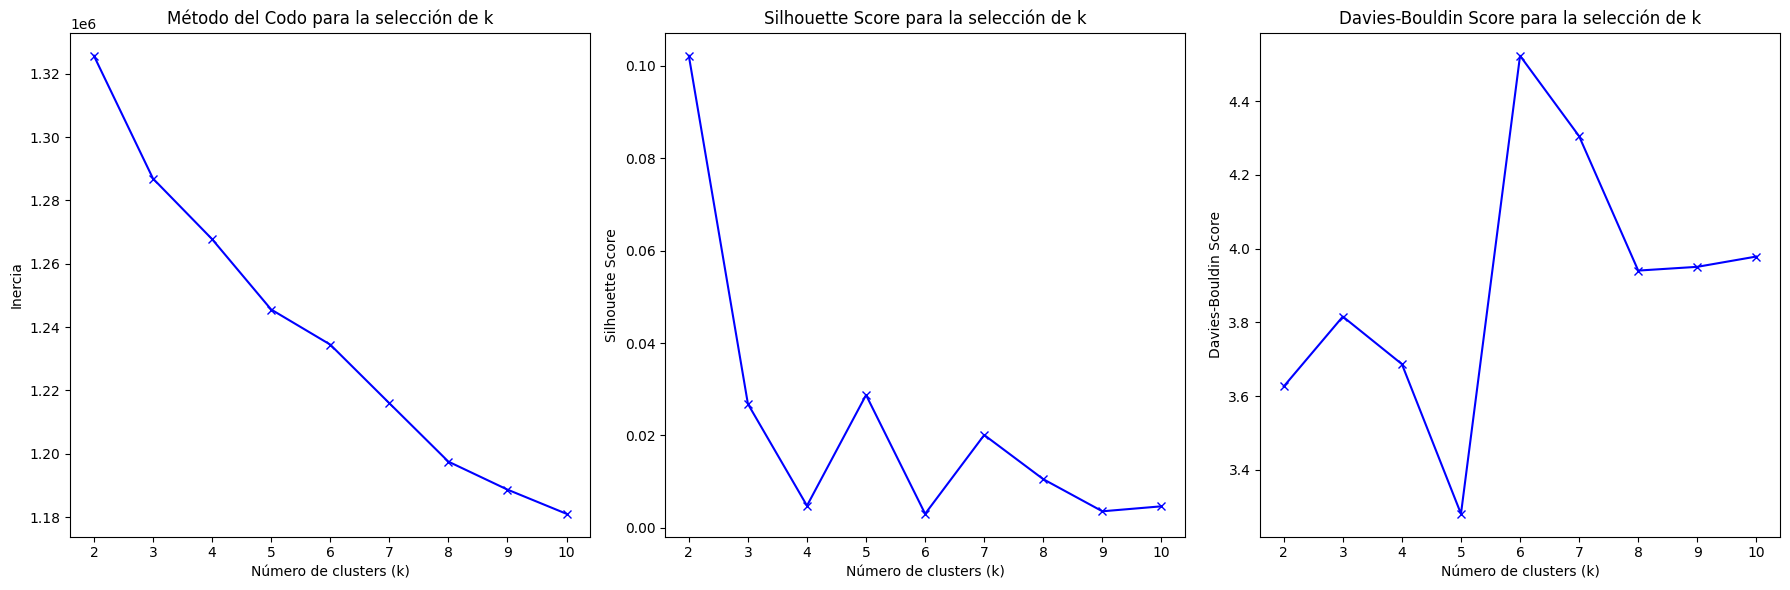

In [53]:
# Plotting the results
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para la selección de k')

plt.subplot(1, 3, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para la selección de k')

plt.subplot(1, 3, 3)
plt.plot(K, davies_bouldin_scores, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score para la selección de k')

plt.tight_layout()
plt.show()


La verdad es que no lo veo muy claro...  

* En el primer gráfico el codo parece estar por el 3 o 4, aunque no es nada marcado.  
* En el de silhouette, el punto más alto es 2, ya en 3 baja, aunque vuelve a subir en 5.   
* En el de Davies-Bouldin, el puto más bajo es el 5.  

Si bien hay consenso sobre el 2, no parece que eso nos genere demasiados grupos interesantes y es posible que alguno de estos agrupe más de un subcluster.  

En cualquier caso, haré 3 pruebas para comparar los resultados y ver qué resulta más interesante, y para ello tomaré como posibles valores de k 2, 3 y 5.


In [54]:
# Valores de k a probar
k_values = [2, 3, 5]

# Diccionario para almacenar los resultados de los clustering
cluster_results = {}

# Lista para almacenar los silhouette scores
silhouette_scores = []

# Crear un nuevo DataFrame para almacenar los resultados de los clusters
epcc23CL = epcc23.copy()

In [55]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(epcc23_clust_scaled)
    cluster_results[k] = clusters
    epcc23CL[f'CL{k}'] = clusters  # Añadir columna de clúster al nuevo DataFrame
    silhouette_scores.append(silhouette_score(epcc23_clust_scaled, clusters))

In [56]:
# Imprimir los silhouette scores
for k, score in zip(k_values, silhouette_scores):
    print(f'Silhouette Score para {k} clusters: {score:.4f}')


Silhouette Score para 2 clusters: 0.1022
Silhouette Score para 3 clusters: 0.0268
Silhouette Score para 5 clusters: 0.0288


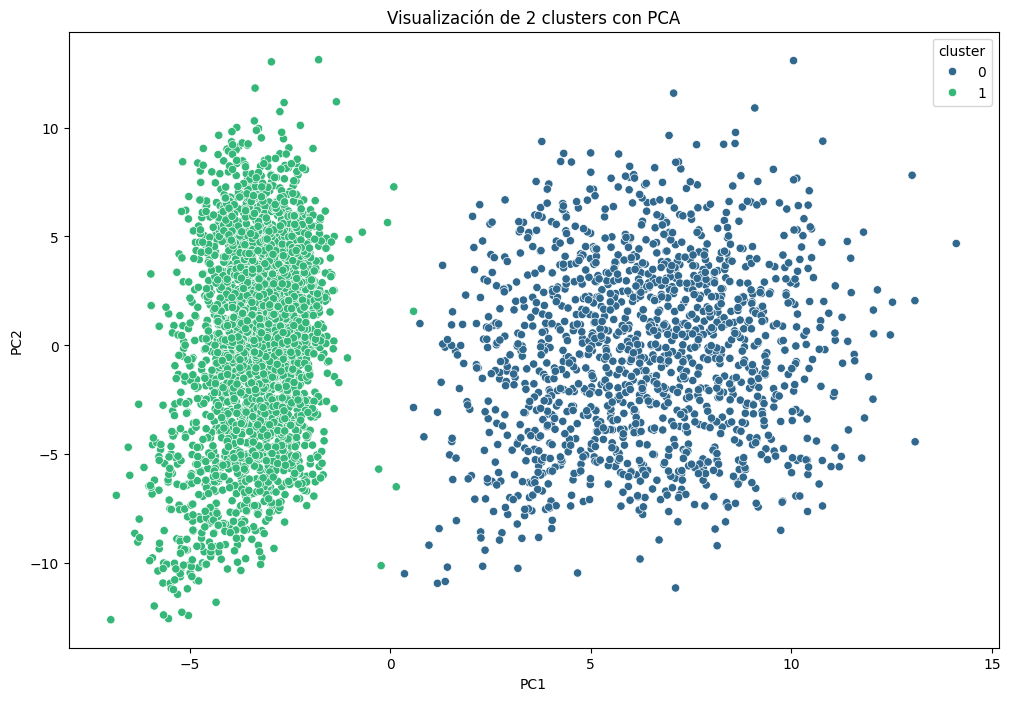

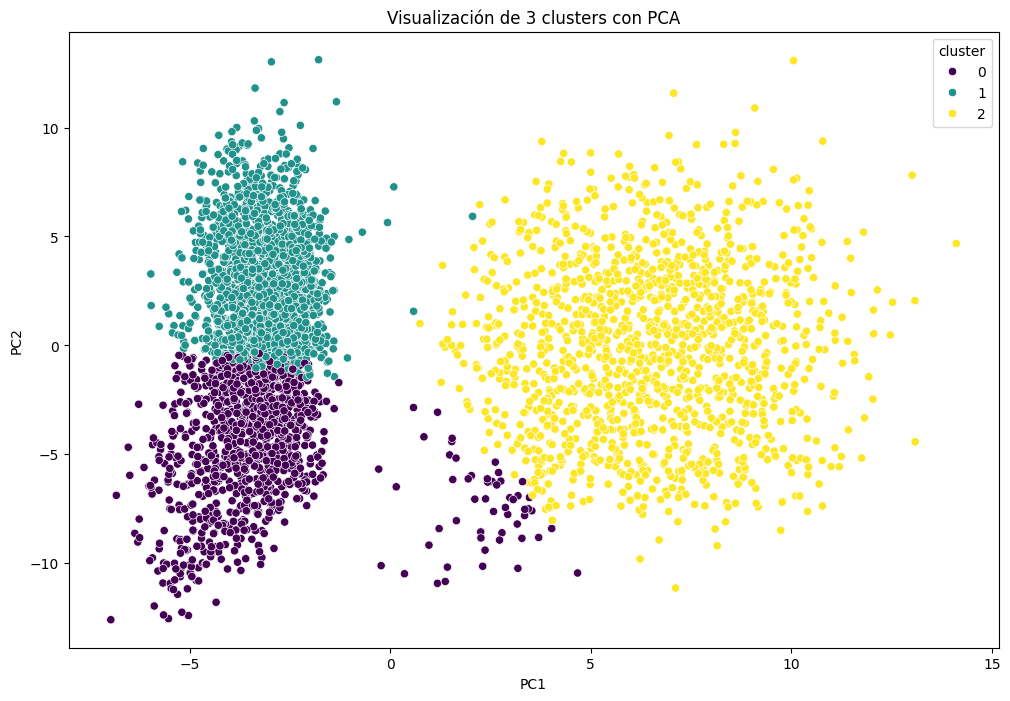

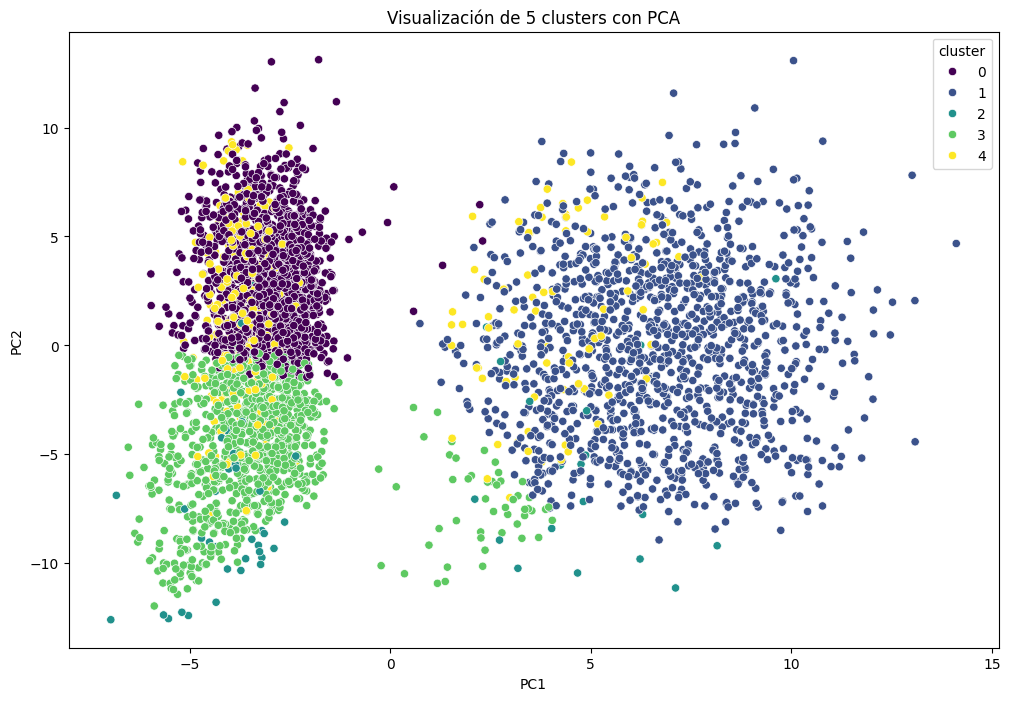

In [57]:
# Visualización de los resultados con PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(epcc23_clust_scaled)

for k in k_values:
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['cluster'] = epcc23CL[f'CL{k}']  # Cambiado de epcc23 a epcc23CL

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis')
    plt.title(f'Visualización de {k} clusters con PCA')
    plt.show()


CONCLUSIÓN:
Para entender cuál es la clusterización más interesante de todas a la hora de entender o segmentar los públcos culturales según sus prácticas, habrá que estudiar sus carcaterísticas, las variables que han tenido mayor peso en cada caso y en qué se diferencian unas clusterizaciones de otras.  

Para ello vamos a usar ANOVA y Chi2

In [58]:
# Función para obtener variables significativas
def obtener_variables_significativas(df, clusters_col, variables, var_dict):
    significant_vars = {}
    for col in variables:
        if col in df.columns:
            try:
                if df[col].dtype in ['int64', 'float64']:  # ANOVA para variables numéricas
                    groups = [df[df[clusters_col] == cluster][col].values for cluster in np.unique(df[clusters_col])]
                    if np.any([len(np.unique(group)) > 1 for group in groups]):  # Asegúrate de que haya variabilidad
                        f_val, p_val = f_oneway(*groups)
                        if p_val < 0.05:  # Umbral de significancia
                            significant_vars[col] = var_dict.get(col, 'Desconocida')
                else:  # Chi-cuadrado para variables categóricas
                    contingency_table = pd.crosstab(df[clusters_col], df[col])
                    chi2_val, p_val = chi2_contingency(contingency_table.values)[:2]
                    if p_val < 0.05:  # Umbral de significancia
                        significant_vars[col] = var_dict.get(col, 'Desconocida')
            except Exception as e:
                print(f"Error processing column {col}: {e}")
    return significant_vars


In [59]:
# Crear un diccionario que mapea cada variable a su lista de origen
var_dict = {}
for idx, var_list in enumerate(variables_consideradas):
    list_name = f'List {idx + 1}'
    flat_list_with_source = flatten_with_source(var_list, list_name)
    for var, source in flat_list_with_source:
        var_dict[var] = source


In [60]:
# Obtener variables significativas para cada clusterización
variables_para_analisis = epcc23_clust.columns.to_list()
significant_vars_cl2 = obtener_variables_significativas(epcc23CL, 'CL2', variables_para_analisis, var_dict)
significant_vars_cl3 = obtener_variables_significativas(epcc23CL, 'CL3', variables_para_analisis, var_dict)
significant_vars_cl5 = obtener_variables_significativas(epcc23CL, 'CL5', variables_para_analisis, var_dict)

print(f'Variables significativas para CL2: {significant_vars_cl2}')
print(f'Variables significativas para CL3: {significant_vars_cl3}')
print(f'Variables significativas para CL5: {significant_vars_cl5}')

Variables significativas para CL2: {'D1': 'List 4', 'D2#1': 'List 4', 'D2#4': 'List 4', 'D2#99': 'List 4', 'D3#1': 'List 4', 'D3#99': 'List 4', 'PP1': 'List 4', 'PP0#1': 'List 4', 'PP0#99': 'List 4', 'PP3#1': 'List 4', 'PP3#2': 'List 4', 'PP3#99': 'List 4', 'R1': 'List 4', 'R2#1': 'List 4', 'R2#99': 'List 4', 'R3#1': 'List 4', 'R3#2': 'List 4', 'R3#99': 'List 4', 'CA2A#1': 'List 4', 'CA2A#2': 'List 4', 'CA2A#3': 'List 4', 'CA2A#4': 'List 4', 'T4#2': 'List 4', 'T4#3': 'List 4', 'T4#4': 'List 4', 'T4#6': 'List 4', 'T4#7': 'List 4', 'T4#8': 'List 4', 'T4#11': 'List 4', 'CA6#1': 'List 4', 'CA6#2': 'List 4', 'CA6#3': 'List 4', 'CA6#4': 'List 4', 'CA6#6': 'List 4', 'CA4#1': 'List 4', 'CA4#3': 'List 4', 'CA51': 'List 4', 'CA5#1': 'List 4', 'CA5#3': 'List 4', 'CA5#6': 'List 4', 'CA5#99': 'List 4', 'IT2': 'List 4', 'IT4#1': 'List 4', 'IT4#2': 'List 4', 'IT4#3': 'List 4', 'IT4#4': 'List 4', 'IT4#99': 'List 4', 'IT5': 'List 9', 'IT6#2': 'List 4', 'IT6#3': 'List 4', 'IT6#4': 'List 4', 'IT6#5': 'Li

In [61]:
# Convertir las listas a sets para operaciones de conjuntos
set_cl2 = set(significant_vars_cl2.keys())
set_cl3 = set(significant_vars_cl3.keys())
set_cl5 = set(significant_vars_cl5.keys())

In [62]:
# Variables comunes a las tres configuraciones
comunes_tres = set_cl2 & set_cl3 & set_cl5


In [63]:
# Variables comunes a dos configuraciones
comunes_cl2_cl3 = (set_cl2 & set_cl3) - comunes_tres
comunes_cl2_cl5 = (set_cl2 & set_cl5) - comunes_tres
comunes_cl3_cl5 = (set_cl3 & set_cl5) - comunes_tres

In [64]:
# Variables específicas de una configuración
especificas_cl2 = set_cl2 - (comunes_tres | comunes_cl2_cl3 | comunes_cl2_cl5)
especificas_cl3 = set_cl3 - (comunes_tres | comunes_cl2_cl3 | comunes_cl3_cl5)
especificas_cl5 = set_cl5 - (comunes_tres | comunes_cl2_cl5 | comunes_cl3_cl5)


In [65]:
# Crear diccionarios con la información de las listas
comunes_tres_dict = {var: var_dict.get(var, 'Desconocida') for var in comunes_tres}
comunes_cl2_cl3_dict = {var: var_dict.get(var, 'Desconocida') for var in comunes_cl2_cl3}
comunes_cl2_cl5_dict = {var: var_dict.get(var, 'Desconocida') for var in comunes_cl2_cl5}
comunes_cl3_cl5_dict = {var: var_dict.get(var, 'Desconocida') for var in comunes_cl3_cl5}
especificas_cl2_dict = {var: var_dict.get(var, 'Desconocida') for var in especificas_cl2}
especificas_cl3_dict = {var: var_dict.get(var, 'Desconocida') for var in especificas_cl3}
especificas_cl5_dict = {var: var_dict.get(var, 'Desconocida') for var in especificas_cl5}


In [66]:
print(f'Variables comunes a las tres configuraciones: {comunes_tres_dict}')
print(f'Variables comunes a CL2 y CL3: {comunes_cl2_cl3_dict}')
print(f'Variables comunes a CL2 y CL5: {comunes_cl2_cl5_dict}')
print(f'Variables comunes a CL3 y CL5: {comunes_cl3_cl5_dict}')
print(f'Variables específicas de CL2: {especificas_cl2_dict}')
print(f'Variables específicas de CL3: {especificas_cl3_dict}')
print(f'Variables específicas de CL5: {especificas_cl5_dict}')

Variables comunes a las tres configuraciones: {'CO7#6': 'Desconocida', 'IT4#99': 'List 4', 'LL3': 'List 4', 'LL5#2': 'List 2', 'VJO10': 'List 2', 'T4#7': 'List 4', 'VJO6#4': 'List 4', 'CA6#6': 'List 4', 'R3#1': 'List 4', 'IT6#7': 'List 4', 'LL5#8': 'List 2', 'M7#7': 'Desconocida', 'VJO7': 'List 4', 'VJO1#7': 'List 2', 'CA5#99': 'List 4', 'VJ7#99': 'List 2', 'CN6#2': 'Desconocida', 'answered_VJO8': 'Desconocida', 'VJO8#9': 'List 4', 'IT4#3': 'List 4', 'answered_VJO7': 'Desconocida', 'CA6#1': 'List 4', 'VJO6#7': 'List 4', 'CA5#1': 'List 4', 'AS2#7': 'List 4', 'PP1': 'List 4', 'CA5#3': 'List 4', 'R3#2': 'List 4', 'IT4#2': 'List 4', 'IT5': 'List 9', 'VJ7#4': 'List 2', 'LL5A#2': 'List 4', 'VJO6': 'List 4', 'VJO1#9': 'List 2', 'VJO8#7': 'List 4', 'CO7#2': 'Desconocida', 'AS2#99': 'List 4', 'VJ3#3': 'List 4', 'BI2#2': 'List 4', 'CN1': 'List 4', 'EX7#6': 'Desconocida', 'VJO8#6': 'List 4', 'D2#1': 'List 4', 'EX7#9': 'Desconocida', 'CO1': 'List 4', 'VJO1#11': 'List 2', 'EX9#5': 'List 2', 'LL12':

Ahora vamos a intentar descifrar qué son esas variables de listas desconocidas

In [67]:
# Diccionario con nombres descriptivos para cada lista
descriptive_list_names = {
    "List 1": "Target Variables",
    "List 2": "Primary Interest Categorical Variables",
    "List 3": "Motivos Comunes No",
    "List 4": "Secondary Interest Categorical Variables",
    "List 5": "Primary Demographic Categorical Variables",
    "List 6": "Secondary Demographic Categorical Variables",
    "List 7": "Administrative Categorical Variables",
    "List 8": "Primary Interest Numerical Variables",
    "List 9": "Secondary Interest Numerical Variables",
    "List 10": "Primary Demographic Numerical Variables",
    "List 11": "Secondary Demographic Numerical Variables",
    "List 12": "Administrative Numerical Variables"
}

# Aplanar la lista de listas y diccionarios en una sola lista con origen
variables_consideradas_flat_with_source = []
for idx, var_list in enumerate(variables_consideradas):
    list_name = f"List {idx + 1}"
    descriptive_name = descriptive_list_names.get(list_name, list_name)
    variables_consideradas_flat_with_source.extend(flatten_with_source(var_list, descriptive_name))

# Separar variables y sus fuentes
variables_consideradas_flat = [var for var, src in variables_consideradas_flat_with_source]

# Crear diccionario para mapear variables a sus listas descriptivas
var_dict = {var: src for var, src in variables_consideradas_flat_with_source}

# Variables significativas y sus listas
variables_significativas = set(significant_vars_cl2) | set(significant_vars_cl3) | set(significant_vars_cl5)

# Variables que no están en el diccionario
variables_desconocidas = [var for var in variables_significativas if var not in var_dict]

print(f'Variables desconocidas: {variables_desconocidas}')

# Comprobar el porcentaje de variables significativas que son desconocidas
total_significativas = len(variables_significativas)
total_desconocidas = len(variables_desconocidas)
print(f'Porcentaje de variables significativas que son desconocidas: {(total_desconocidas / total_significativas) * 100:.2f}%')

# Comprobar el mapeo inicial
print(f'Mapeo inicial de var_dict: {list(var_dict.keys())[:20]}')  # Muestra los primeros 20 elementos de var_dict

# Crear diccionarios con la información de las listas
comunes_tres_dict = {var: var_dict.get(var, 'Desconocida') for var in comunes_tres}
comunes_cl2_cl3_dict = {var: var_dict.get(var, 'Desconocida') for var in comunes_cl2_cl3}
comunes_cl2_cl5_dict = {var: var_dict.get(var, 'Desconocida') for var in comunes_cl2_cl5}
comunes_cl3_cl5_dict = {var: var_dict.get(var, 'Desconocida') for var in comunes_cl3_cl5}
especificas_cl2_dict = {var: var_dict.get(var, 'Desconocida') for var in especificas_cl2}
especificas_cl3_dict = {var: var_dict.get(var, 'Desconocida') for var in especificas_cl3}
especificas_cl5_dict = {var: var_dict.get(var, 'Desconocida') for var in especificas_cl5}

print(f'Variables comunes a las tres configuraciones: {comunes_tres_dict}')
print(f'Variables comunes a CL2 y CL3: {comunes_cl2_cl3_dict}')
print(f'Variables comunes a CL2 y CL5: {comunes_cl2_cl5_dict}')
print(f'Variables comunes a CL3 y CL5: {comunes_cl3_cl5_dict}')
print(f'Variables específicas de CL2: {especificas_cl2_dict}')
print(f'Variables específicas de CL3: {especificas_cl3_dict}')
print(f'Variables específicas de CL5: {especificas_cl5_dict}')


Variables desconocidas: ['CN6#2', 'answered_VJO8', 'CN6#88', 'answered_CO1A#2', 'answered_VJO7B', 'CN6#5', 'M7#10', 'EX7#88', 'CO7#4', 'CN6#6', 'answered_VJO5', 'ES6#5', 'EX7#99', 'answered_CN1', 'M7#1', 'answered_IT2', 'answered_PP1', 'CN6#9', 'M7#4', 'ES6#7', 'M7#2', 'CO7#7', 'answered_LL1', 'answered_CO1', 'answered_VJO13', 'answered_EX1A#1', 'ES6#4', 'answered_CS1', 'CN6#99', 'ES6#2', 'ES6#99', 'answered_EX1', 'CN6#4', 'M7#11', 'CO7#6', 'answered_I3', 'EX7#5', 'EX7#6', 'EX7#9', 'EX7#1', 'answered_CS2', 'answered_D1', 'CO7#1', 'EX7#8', 'ES6#1', 'answered_ES1', 'answered_OR2', 'CO7#99', 'answered_AS1', 'ES6#88', 'answered_CS15A', 'CN6#3', 'answered_CA1', 'EX7#3', 'answered_BI1', 'M7#7', 'answered_VJO7', 'CO7#2', 'CO7#10', 'ES6#6', 'CN6#1', 'EX7#2', 'answered_R1', 'answered_LL13', 'answered_I4', 'EX7#7', 'M7#99', 'EX7#4', 'answered_M1']
Porcentaje de variables significativas que son desconocidas: 21.97%
Mapeo inicial de var_dict: ['VJ1B', 'M2', 'CO1A#1', 'CO1A#2', 'CN1A', 'ES1A', 'EX1

---------------------------------------------------------------------------------

Ahora analicemos esos clústers, qué nos arrojan en relación a nuestros targets, si es que hay alguna:

In [68]:
# Definir los targets
y1 = epcc23["VJ1B"]
y2 = epcc23["M2"]
y3 = epcc23[["CO1A#1", "CO1A#2"]].sum(axis=1)  # Sumar las variables relacionadas con número de conciertos y de festivales
y4 = epcc23["CN1A"]
y5 = epcc23["ES1A"]
y6 = epcc23[["EX1A#1", "EX1A#2", "EX1A#3", "EX1A#4", "EX1A#5"]].sum(axis=1)  # Sumar las columnas relacionadas con museos, galerías y otros.
y7 = epcc23["LL1A"]

# Crear epcc23CL a partir de epcc23 y añadir los clusters y targets sumados
epcc23CL = epcc23.copy()
epcc23CL["y3"] = y3
epcc23CL["y6"] = y6

# Renombrar los targets
renombrar_targets = {
    "VJ1B": "Videojuegos",
    "M2": "Música",
    "y3": "Conciertos",
    "CN1A": "Cine",
    "ES1A": "Espectáculos",
    "y6": "Exposiciones",
    "LL1A": "Libros"
}

In [69]:
# Crear un diccionario para almacenar los resultados
resultados_medias = {}

In [70]:
# Función para calcular las medias de los targets por cluster
def calcular_medias_clusters(df, clusters_col, targets):
    return df.groupby(clusters_col)[targets].mean()

# Definir los targets sumados para cálculo de medias
targets_sumados = ["VJ1B", "M2", "y3", "CN1A", "ES1A", "y6", "LL1A"]

In [72]:
#####  VERIFICACION
# Verificar que los clusters y los targets estén en epcc23CL
print("Columnas en epcc23CL:", epcc23CL.columns)

# Verificar los primeros registros para asegurarse de que los clusters y los targets están presentes
print(epcc23CL[['CL2', 'CL3', 'CL5', 'VJ1B', 'M2', 'y3', 'CN1A', 'ES1A', 'y6', 'LL1A']].head())

# Verificar si hay valores nulos en las columnas de clusters y targets
print("Valores nulos en columnas de clusters y targets:")
print(epcc23CL[['CL2', 'CL3', 'CL5', 'VJ1B', 'M2', 'y3', 'CN1A', 'ES1A', 'y6', 'LL1A']].isnull().sum())

Columnas en epcc23CL: Index(['EDAT', 'I1', 'AJ1', 'I4', 'I3', 'D1', 'D2#1', 'D2#2', 'D2#4', 'D2#99',
       ...
       'answered_LL13', 'answered_BI1', 'answered_AS1', 'answered_OR2',
       'answered_CS1', 'answered_CS2', 'answered_CS15A', 'answered_I4', 'y3',
       'y6'],
      dtype='object', length=541)


KeyError: "['CL2', 'CL3', 'CL5'] not in index"

In [73]:
#####  VERIFICACION
# Verificar que las columnas de clusters se están añadiendo correctamente
print("Columnas antes de añadir clusters:", epcc23CL.columns)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(epcc23_clust_scaled)
    cluster_results[k] = clusters
    epcc23CL[f'CL{k}'] = clusters  # Añadir columna de clúster al nuevo DataFrame
    silhouette_scores.append(silhouette_score(epcc23_clust_scaled, clusters))

print("Columnas después de añadir clusters:", epcc23CL.columns)

Columnas antes de añadir clusters: Index(['EDAT', 'I1', 'AJ1', 'I4', 'I3', 'D1', 'D2#1', 'D2#2', 'D2#4', 'D2#99',
       ...
       'answered_LL13', 'answered_BI1', 'answered_AS1', 'answered_OR2',
       'answered_CS1', 'answered_CS2', 'answered_CS15A', 'answered_I4', 'y3',
       'y6'],
      dtype='object', length=541)
Columnas después de añadir clusters: Index(['EDAT', 'I1', 'AJ1', 'I4', 'I3', 'D1', 'D2#1', 'D2#2', 'D2#4', 'D2#99',
       ...
       'answered_OR2', 'answered_CS1', 'answered_CS2', 'answered_CS15A',
       'answered_I4', 'y3', 'y6', 'CL2', 'CL3', 'CL5'],
      dtype='object', length=544)


In [74]:
### VERIFICACION
# Verificar los primeros registros para asegurarse de que los clusters y los targets están presentes
print("Primeros registros de epcc23CL con columnas de clusters y targets:")
print(epcc23CL[['CL2', 'CL3', 'CL5', 'VJ1B', 'M2', 'y3', 'CN1A', 'ES1A', 'y6', 'LL1A']].head())

# Verificar si hay valores nulos en las columnas de clusters y targets
print("Valores nulos en columnas de clusters y targets:")
print(epcc23CL[['CL2', 'CL3', 'CL5', 'VJ1B', 'M2', 'y3', 'CN1A', 'ES1A', 'y6', 'LL1A']].isnull().sum())


Primeros registros de epcc23CL con columnas de clusters y targets:
   CL2  CL3  CL5  VJ1B    M2      y3   CN1A   ES1A      y6  LL1A
0    0    2    1   2.0  99.0  1998.0  999.0  999.0  4995.0  99.0
1    0    2    1  14.0  99.0  1998.0  999.0  999.0  4995.0  99.0
2    0    2    1   3.0  99.0  1998.0  999.0  999.0  4995.0   2.0
3    0    2    1   3.0  99.0  1998.0  999.0  999.0  4995.0  99.0
4    0    2    1  15.0  99.0  1998.0  999.0  999.0  4995.0  99.0
Valores nulos en columnas de clusters y targets:
CL2     0
CL3     0
CL5     0
VJ1B    0
M2      0
y3      0
CN1A    0
ES1A    0
y6      0
LL1A    0
dtype: int64


In [76]:
#### VERIFICACION
# Definir los targets
targets_sumados = ["VJ1B", "M2", "y3", "CN1A", "ES1A", "y6", "LL1A"]

# Calcular las medias para cada configuración de clusters
medias_cl2 = calcular_medias_clusters(epcc23CL, 'CL2', targets_sumados)
medias_cl3 = calcular_medias_clusters(epcc23CL, 'CL3', targets_sumados)
medias_cl5 = calcular_medias_clusters(epcc23CL, 'CL5', targets_sumados)

# Renombrar los targets en los resultados
medias_cl2.rename(columns=renombrar_targets, inplace=True)
medias_cl3.rename(columns=renombrar_targets, inplace=True)
medias_cl5.rename(columns=renombrar_targets, inplace=True)

# Almacenar los resultados en el diccionario
resultados_medias['CL2'] = medias_cl2
resultados_medias['CL3'] = medias_cl3
resultados_medias['CL5'] = medias_cl5

# Mostrar los resultados
for cl, medias in resultados_medias.items():
    print(f'Medias para {cl}:')
    print(medias)
    print('\n')


Medias para CL2:
     Videojuegos  Música  Conciertos   Cine  Espectáculos  Exposiciones  \
CL2                                                                       
0     252.783345    99.0      1998.0  999.0         999.0        4995.0   
1     998.267085    99.0      1998.0  999.0         999.0        4995.0   

        Libros  
CL2             
0    50.172195  
1    39.889176  


Medias para CL3:
     Videojuegos  Música  Conciertos   Cine  Espectáculos  Exposiciones  \
CL3                                                                       
0     970.562724    99.0      1998.0  999.0         999.0        4995.0   
1     997.784409    99.0      1998.0  999.0         999.0        4995.0   
2     248.164714    99.0      1998.0  999.0         999.0        4995.0   

        Libros  
CL3             
0    77.289427  
1    16.381851  
2    48.257687  


Medias para CL5:
     Videojuegos  Música  Conciertos   Cine  Espectáculos  Exposiciones  \
CL5                                     

In [71]:
# Calcular las medias para cada configuración de clusters
medias_cl2 = calcular_medias_clusters(epcc23CL, 'CL2', targets_sumados)
medias_cl3 = calcular_medias_clusters(epcc23CL, 'CL3', targets_sumados)
medias_cl5 = calcular_medias_clusters(epcc23CL, 'CL5', targets_sumados)

# Renombrar los targets en los resultados
medias_cl2.rename(columns=renombrar_targets, inplace=True)
medias_cl3.rename(columns=renombrar_targets, inplace=True)
medias_cl5.rename(columns=renombrar_targets, inplace=True)

# Almacenar los resultados en el diccionario
resultados_medias['CL2'] = medias_cl2
resultados_medias['CL3'] = medias_cl3
resultados_medias['CL5'] = medias_cl5

KeyError: 'CL2'

In [ ]:
# Calcular el total de entrevistados
total_entrevistados = epcc23.shape[0]

# Función para calcular y almacenar los porcentajes
def calcular_porcentajes(medias, total_entrevistados):
    porcentajes = {}
    for cluster, row in medias.iterrows():
        porcentajes[cluster] = {target: (media / total_entrevistados) * 100 for target, media in row.items()}
    return porcentajes

In [ ]:
# Calcular los porcentajes para cada configuración de clusters
porcentajes_cl2 = calcular_porcentajes(resultados_medias['CL2'], total_entrevistados)
porcentajes_cl3 = calcular_porcentajes(resultados_medias['CL3'], total_entrevistados)
porcentajes_cl5 = calcular_porcentajes(resultados_medias['CL5'], total_entrevistados)


In [ ]:
# Función para imprimir los porcentajes en un formato alineado
def imprimir_porcentajes_alineados(porcentajes, title):
    cluster_keys = list(porcentajes.keys())
    target_keys = list(porcentajes[cluster_keys[0]].keys())
    
    print(f'{title}:')
    print("Clusters".ljust(15) + " | ".join([f'Cluster {k}'.ljust(15) for k in cluster_keys]))
    print("-" * (17 * (len(cluster_keys) + 1)))
    
    for target in target_keys:
        row = target.ljust(15)
        for cluster in cluster_keys:
            percentage = porcentajes[cluster][target]
            row += f'| {percentage:.2f}%'.ljust(15)
        print(row)
    print('\n')

In [ ]:
# Visualización de las medias de los targets por cluster
def plot_medias_clusters(medias, title, total_entrevistados):
    medias_melted = medias.reset_index().melt(id_vars=medias.index.name, var_name='Target', value_name='Media')
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=medias.index.name, y='Media', hue='Target', data=medias_melted, palette='viridis')
    plt.title(title)
    
    # Añadir los porcentajes encima de las barras con inclinación
    for p in ax.patches:
        percentage = (p.get_height() / total_entrevistados) * 100
        ax.annotate(f'{percentage:.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', 
                    rotation=45,
                    xytext=(0, 9), 
                    textcoords='offset points')

    plt.show()


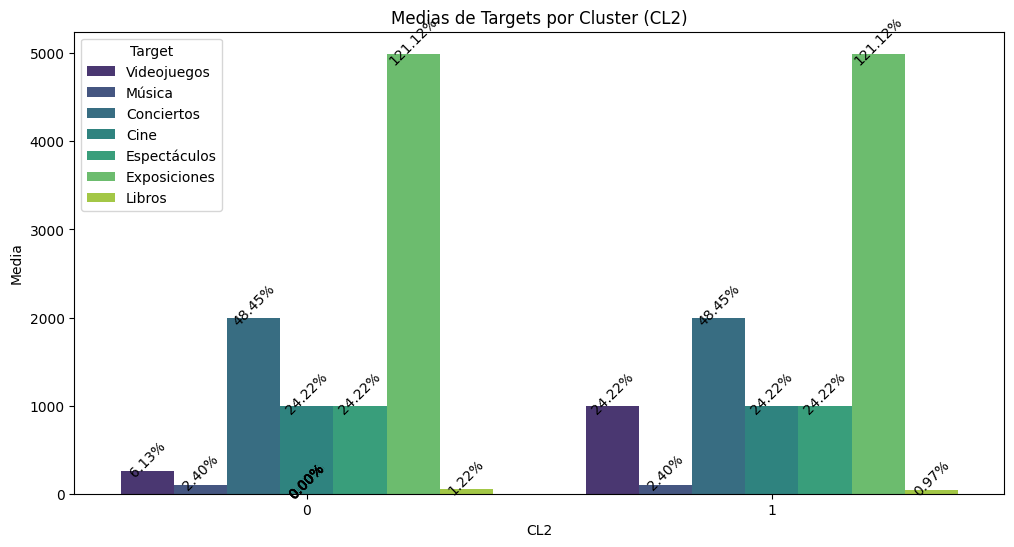

Clusterización 2:
Clusters       Cluster 0       | Cluster 1      
---------------------------------------------------
Videojuegos    | 6.13%        | 24.22%       
Música         | 2.40%        | 2.40%        
Conciertos     | 48.45%       | 48.45%       
Cine           | 24.22%       | 24.22%       
Espectáculos   | 24.22%       | 24.22%       
Exposiciones   | 121.12%      | 121.12%      
Libros         | 1.22%        | 0.97%        




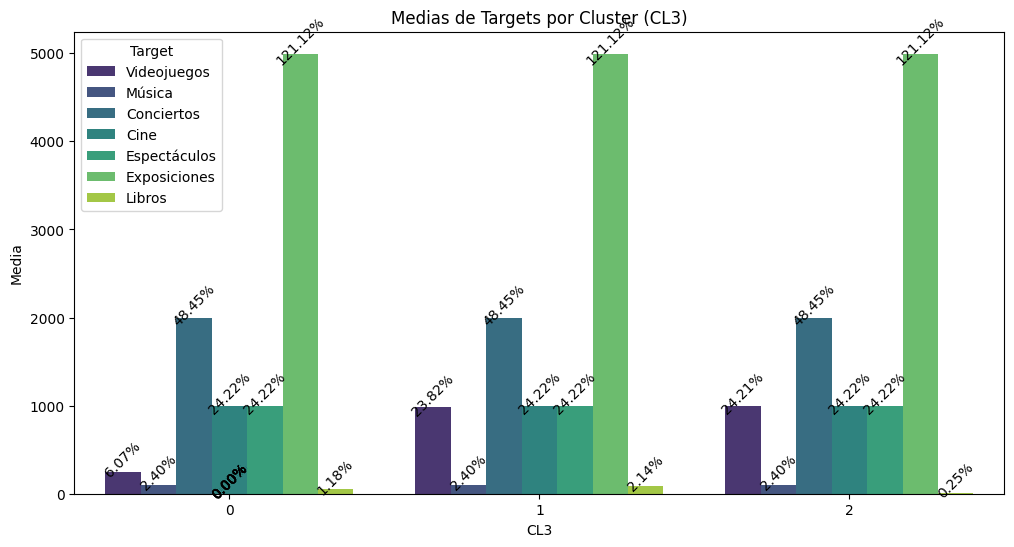

Clusterización 3:
Clusters       Cluster 0       | Cluster 1       | Cluster 2      
--------------------------------------------------------------------
Videojuegos    | 6.07%        | 23.82%       | 24.21%       
Música         | 2.40%        | 2.40%        | 2.40%        
Conciertos     | 48.45%       | 48.45%       | 48.45%       
Cine           | 24.22%       | 24.22%       | 24.22%       
Espectáculos   | 24.22%       | 24.22%       | 24.22%       
Exposiciones   | 121.12%      | 121.12%      | 121.12%      
Libros         | 1.18%        | 2.14%        | 0.25%        




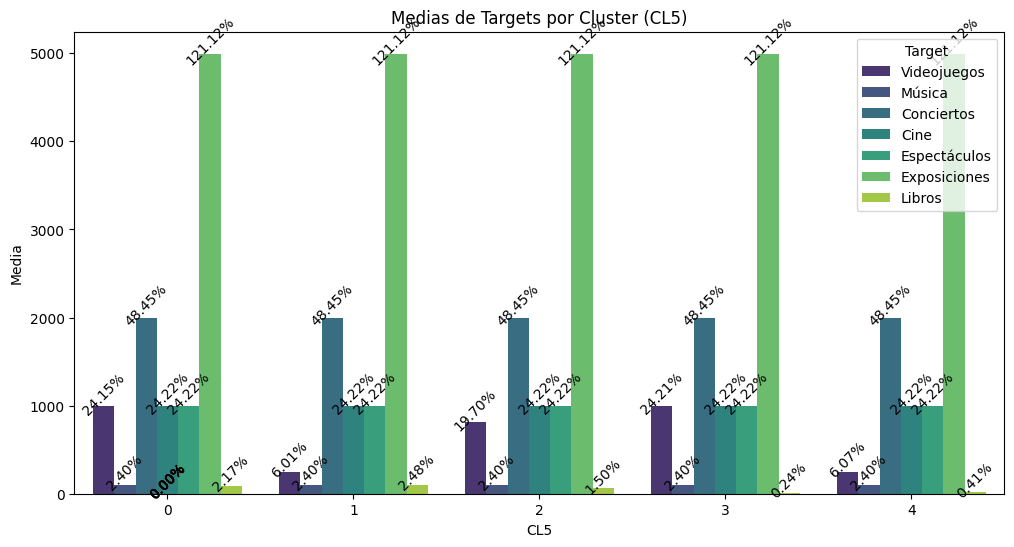

Clusterización 5:
Clusters       Cluster 0       | Cluster 1       | Cluster 2       | Cluster 3       | Cluster 4      
------------------------------------------------------------------------------------------------------
Videojuegos    | 24.15%       | 6.01%        | 19.70%       | 24.21%       | 6.07%        
Música         | 2.40%        | 2.40%        | 2.40%        | 2.40%        | 2.40%        
Conciertos     | 48.45%       | 48.45%       | 48.45%       | 48.45%       | 48.45%       
Cine           | 24.22%       | 24.22%       | 24.22%       | 24.22%       | 24.22%       
Espectáculos   | 24.22%       | 24.22%       | 24.22%       | 24.22%       | 24.22%       
Exposiciones   | 121.12%      | 121.12%      | 121.12%      | 121.12%      | 121.12%      
Libros         | 2.17%        | 2.48%        | 1.50%        | 0.24%        | 0.41%        




In [ ]:
# Graficar las medias y mostrar los porcentajes para cada configuración de clusters
for key in ['CL2', 'CL3', 'CL5']:
    plot_medias_clusters(resultados_medias[key], f'Medias de Targets por Cluster ({key})', total_entrevistados)
    imprimir_porcentajes_alineados(eval(f'porcentajes_{key.lower()}'), f'Clusterización {key[-1]}')

Lamentablemente la clusterización no ha mostrado ningun patrón de consumo cultural especialmente interesante. Por el contrario, las 3 clusterizaciones arrojan resultados casi idénticos que solo se diferencian en 2 sectores: la lectura y los videonuegos.  

En el caso de CL2 (2 clústers), encontramos:       
  
| Clusters       | Cluster 0  | Cluster 1  |
|----------------|------------|------------|
| Videojuegos    | 6.13%      | 24.22%     |
| Libros         | 1.22%      | 0.97%      |   

Es decir, a mayor hábito de videojuegos, menos lectura

En el caso de CL3 (3 clústers), encontramos:       
  
| Clusters       | Cluster 0  | Cluster 1  | Cluster 2  |
|----------------|------------|------------|------------|
| Videojuegos    | 6.07%      | 23.82%     | 24.21%     |
| Libros         | 1.18%      | 2.14%      | 0.25%      |      

En este caso, la mayor tasa de lectura correspon de a la segunda mejor tasa de uso de videojuegos. Ese cluster 1 es que más cultura agregada consume.

En el caso de CL5 (5 clústers), encontramos:       
  
| Clusters       | Cluster 0  | Cluster 1  | Cluster 2  | Cluster 3  | Cluster 4  |
|----------------|------------|------------|------------|------------|------------|
| Videojuegos    | 24.15%     | 6.01%      | 19.70%     | 24.21%     | 6.07%      |
| Libros         | 2.17%      | 2.48%      | 1.50%      | 0.24%      | 0.41%      |   

En este último caso, hay 2 clustersde alto cosumo de videojuegos, uno de los cuales (0) también es de los que más lee, mientras que el otro (2) es de los que menos lee.  
Y en el sentido contrario, de los 2 clústers que menos videojuegos consumen, uno (1) tiene una tasa de lectura mñas alta de todos, mientras que el otro (4) tiene la segunda más baja.  
El cluster restante tiene cifras medias, tirando a altas, en ambos ámbitos.


Lamentablemente, esta encuesta, analizada con este medio (clusterización KMeans) no arroja ningún patrón sorprendente de consumo cultural.  
Es de pensar que estas variables no son las adecuadas para descubrir otros patrones de consumo o comportamiento cultural sino que reproducen, respaldan o amplifican de alguna forma los patrones ya conocidos. Es decir, profundizan y aportan más detalles sobre ls patrones conocidos, sin aportar variables novedosas que puedan vincularse al consumo cultural de los entrevistados desde un punto de vista innovador.

Solo queda por ver si estos segmentos ínfimamente diferenciados responden a las clásicas características sociodemográficas.  
Para ello, primero voy a analizar las principales variables sociodemográficas en cada caso, detectar si hay diferencias significativas entre los clusters, para cada clusterización y, cuando las haya, reflejar esos datos en columnas.

In [ ]:
# Diccionario para renombrar las variables
renombrar_variables = {
    "AJ1": "Municipio",
    "I4": "Unidad convivencia",
    "OR2": "Origen nacimiento",
    "CS1": "Situación laboral",
    "CS3": "Profesión",
    "CS13": "Nivel estudios",
    "AmT": "Ámbito territorial",
    "G6": "Años en España",
    "G2": "Ingresos hogar",
    "G2A": "Ingresos personales"
}

In [ ]:
# Función para aplanar listas
def flatten(l):
    flat_list = []
    for item in l:
        if isinstance(item, list):
            flat_list.extend(flatten(item))
        else:
            flat_list.append(item)
    return flat_list

# Aplanar la lista de variables demográficas
var_demograf_totales_flat = flatten(var_demograf_totales)

In [ ]:
# Función para plotear y añadir porcentajes
def plot_sociodemograficas_clusters(df, clusters_col, variable, title):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')
    plt.title(title)
    plt.xlabel(clusters_col)
    plt.ylabel(renombrar_variables.get(variable, variable))
    
    total_values = df[variable].count()
    
    for p in ax.patches:
        percentage = (p.get_height() / total_values) * 100
        if percentage > 0:
            ax.annotate(f'{percentage:.2f}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', 
                        rotation=45,
                        xytext=(0, 9), 
                        textcoords='offset points')
    
    plt.show()
    return ax

In [ ]:
# Función para calcular diferencias significativas con umbral
def calcular_diferencias_significativas_umbral(df, clusters_col, variable, umbral=10):
    grupos = df.groupby(clusters_col)[variable].mean()
    max_diff = grupos.max() - grupos.min()
    if max_diff >= umbral:
        return True
    return False

In [ ]:
# Función para calcular y almacenar los porcentajes
def calcular_porcentajes(medias, total_entrevistados):
    porcentajes = {}
    for cluster, row in medias.iterrows():
        porcentajes[cluster] = {target: (media / total_entrevistados) * 100 for target, media in row.items()}
    return porcentajes

C:\Users\marce\AppData\Local\Temp\ipykernel_30108\479186507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')


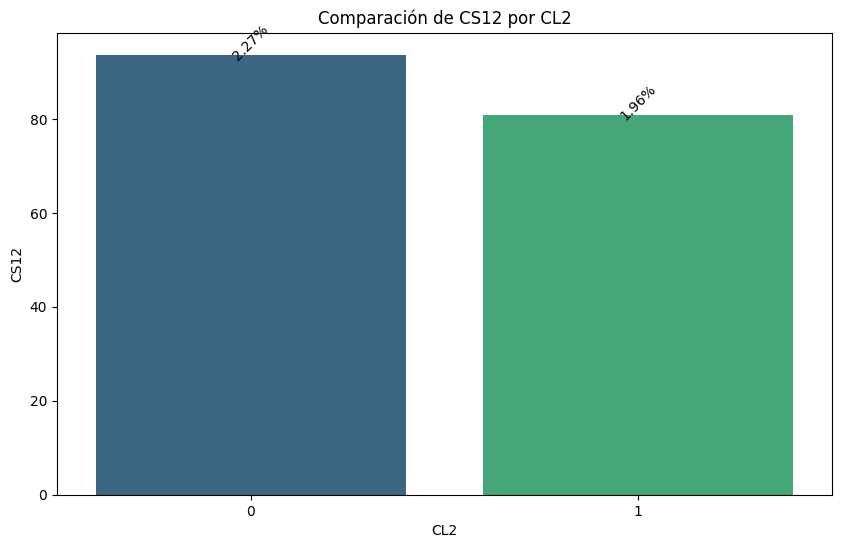

C:\Users\marce\AppData\Local\Temp\ipykernel_30108\479186507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')



Porcentajes para CS12:
Cluster CS12:
  0: 2.27%
  1: 1.96%


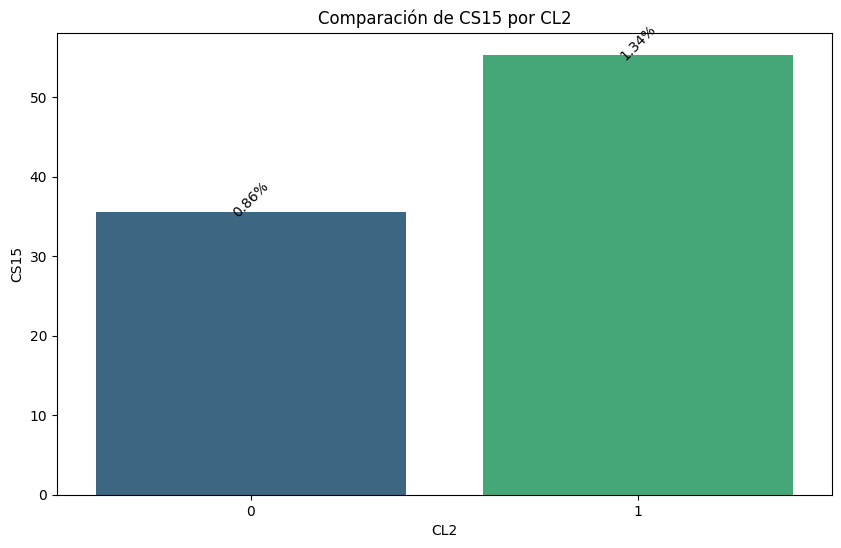


Porcentajes para CS15:
Cluster CS15:
  0: 0.86%
  1: 1.34%


C:\Users\marce\AppData\Local\Temp\ipykernel_30108\479186507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')


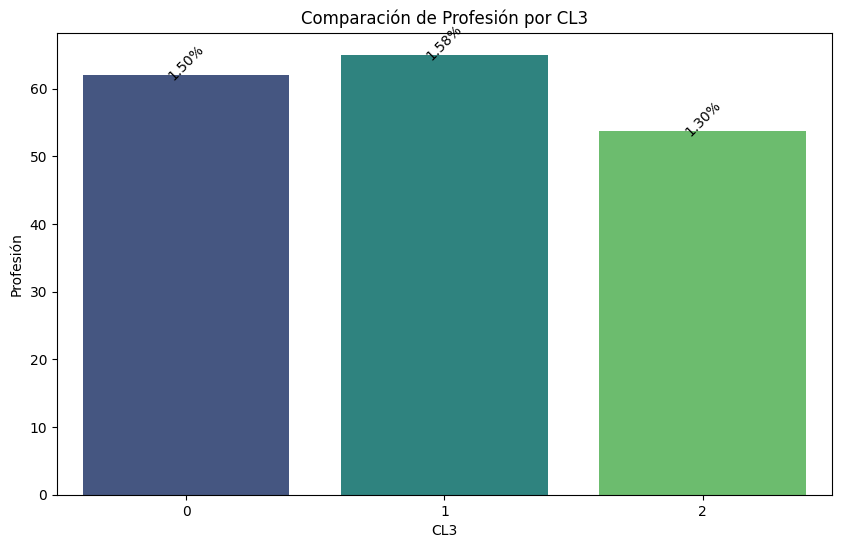

C:\Users\marce\AppData\Local\Temp\ipykernel_30108\479186507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')



Porcentajes para Profesión:
Cluster CS3:
  0: 1.50%
  1: 1.58%
  2: 1.30%


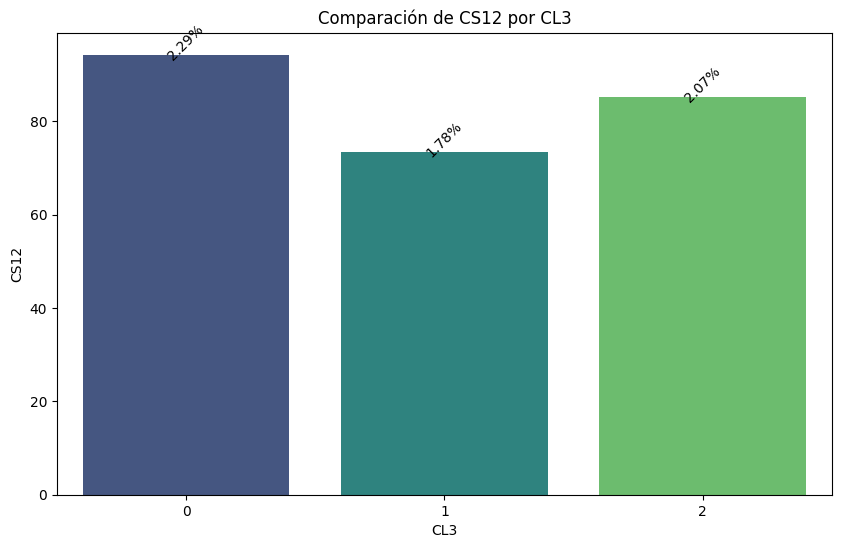


Porcentajes para CS12:
Cluster CS12:
  0: 2.29%
  1: 1.78%
  2: 2.07%


C:\Users\marce\AppData\Local\Temp\ipykernel_30108\479186507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')


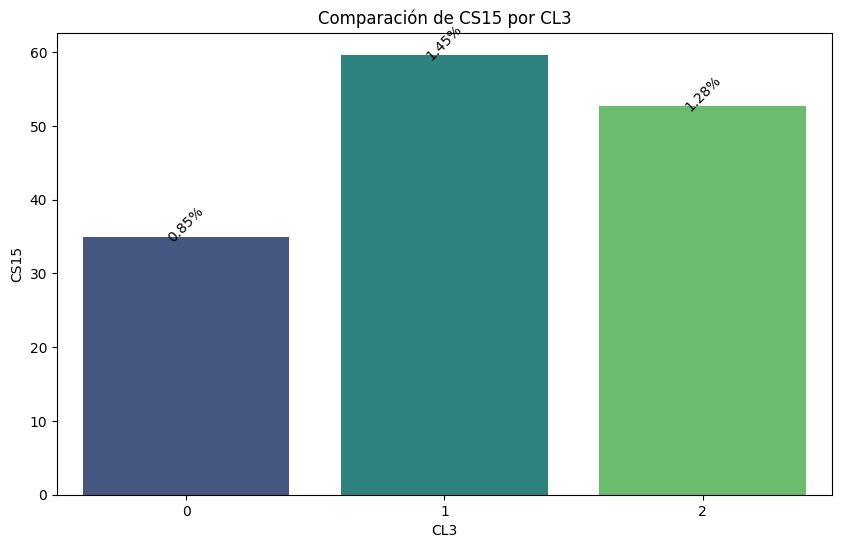


Porcentajes para CS15:
Cluster CS15:
  0: 0.85%
  1: 1.45%
  2: 1.28%


C:\Users\marce\AppData\Local\Temp\ipykernel_30108\479186507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')


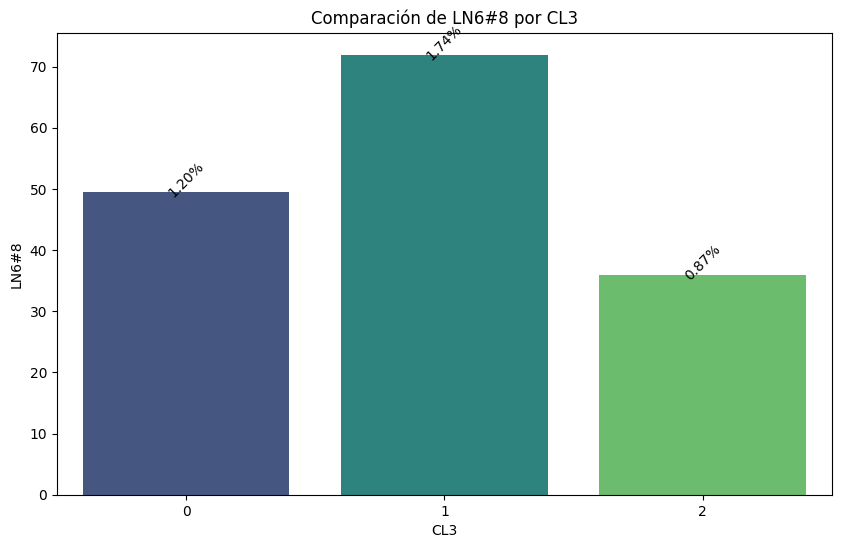


Porcentajes para LN6#8:
Cluster LN6#8:
  0: 1.20%
  1: 1.74%
  2: 0.87%


C:\Users\marce\AppData\Local\Temp\ipykernel_30108\479186507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')


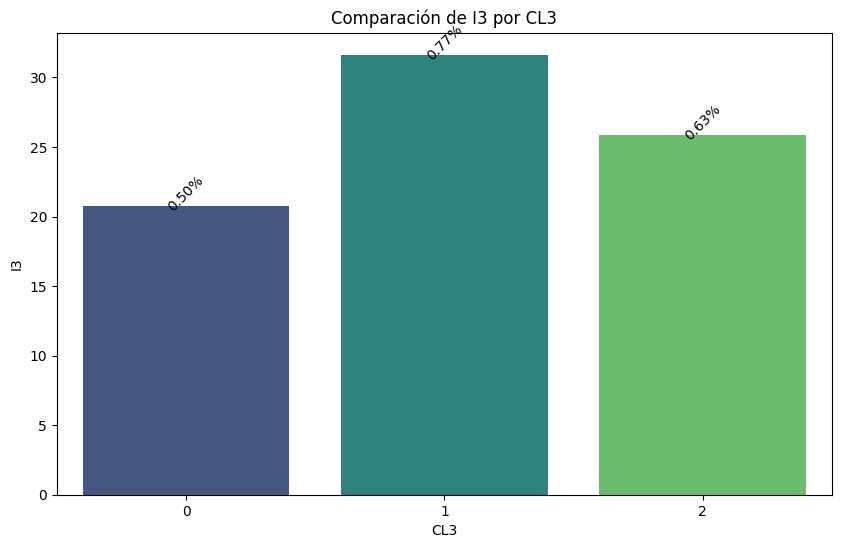


Porcentajes para I3:
Cluster I3:
  0: 0.50%
  1: 0.77%
  2: 0.63%


C:\Users\marce\AppData\Local\Temp\ipykernel_30108\479186507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')


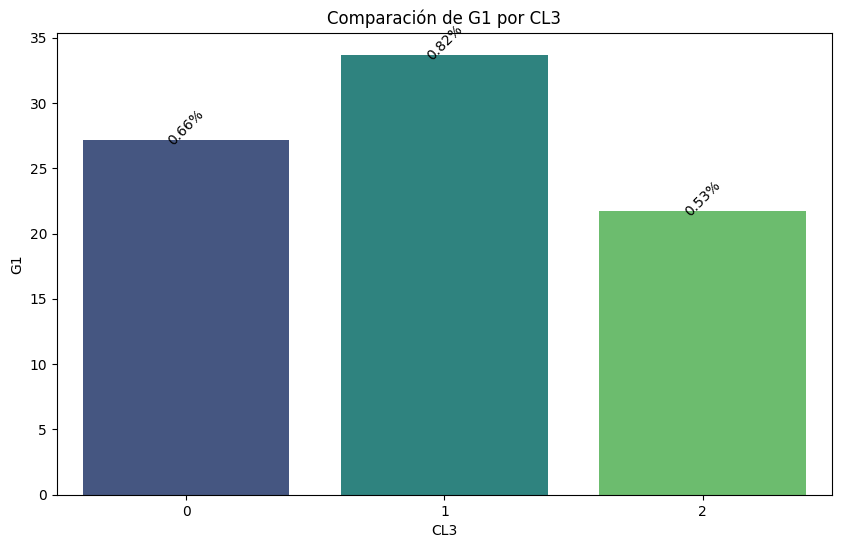


Porcentajes para G1:
Cluster G1:
  0: 0.66%
  1: 0.82%
  2: 0.53%


C:\Users\marce\AppData\Local\Temp\ipykernel_30108\479186507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')


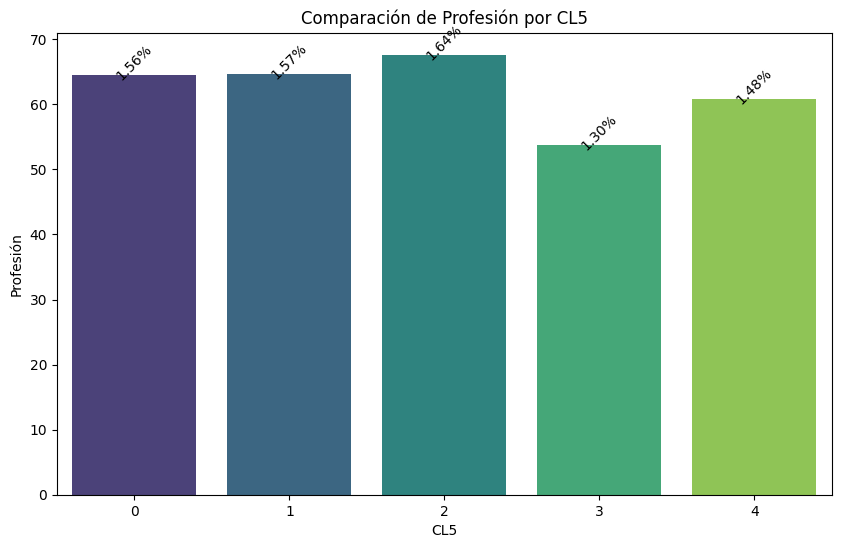


Porcentajes para Profesión:
Cluster CS3:
  0: 1.56%
  1: 1.57%
  2: 1.64%
  3: 1.30%
  4: 1.48%


C:\Users\marce\AppData\Local\Temp\ipykernel_30108\479186507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')


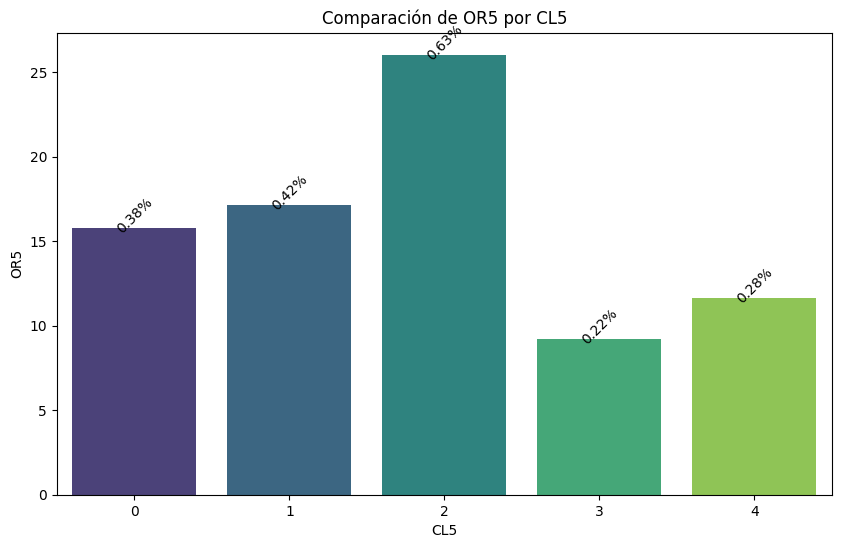


Porcentajes para OR5:
Cluster OR5:
  0: 0.38%
  1: 0.42%
  2: 0.63%
  3: 0.22%
  4: 0.28%


C:\Users\marce\AppData\Local\Temp\ipykernel_30108\479186507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')


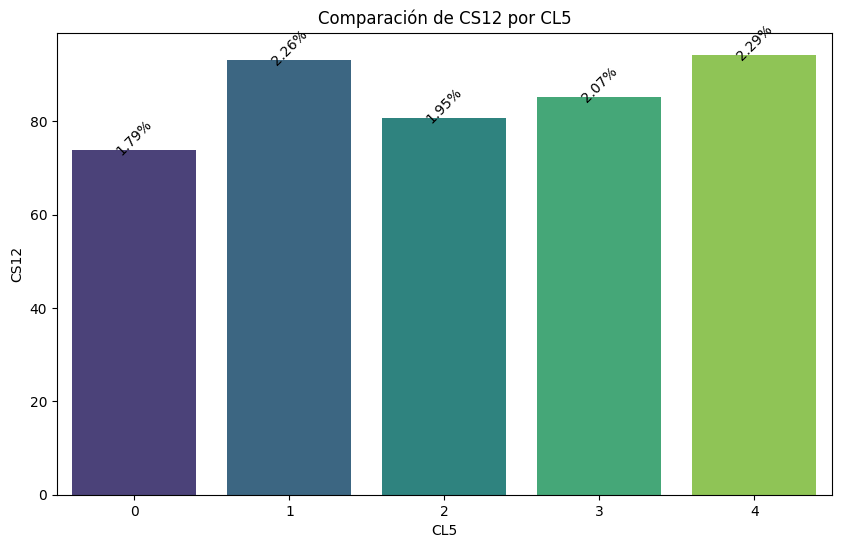


Porcentajes para CS12:
Cluster CS12:
  0: 1.79%
  1: 2.26%
  2: 1.95%
  3: 2.07%
  4: 2.29%


C:\Users\marce\AppData\Local\Temp\ipykernel_30108\479186507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')


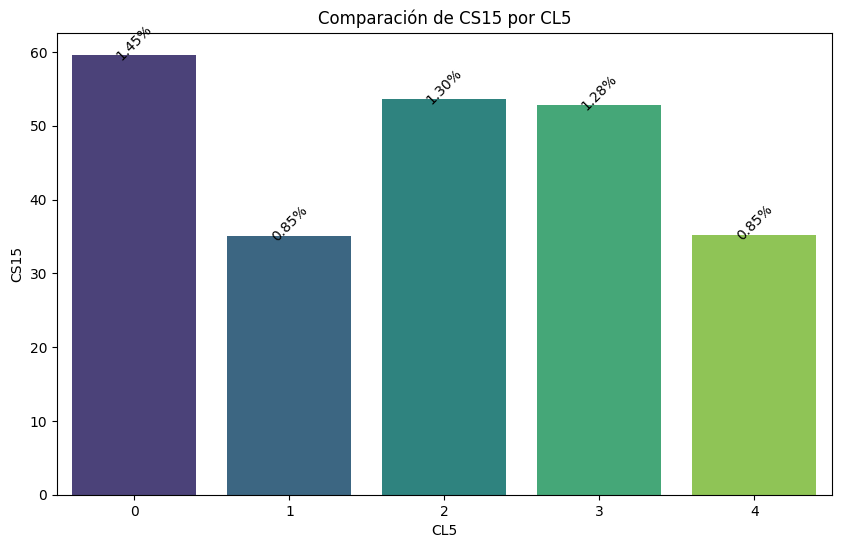


Porcentajes para CS15:
Cluster CS15:
  0: 1.45%
  1: 0.85%
  2: 1.30%
  3: 1.28%
  4: 0.85%


C:\Users\marce\AppData\Local\Temp\ipykernel_30108\479186507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')


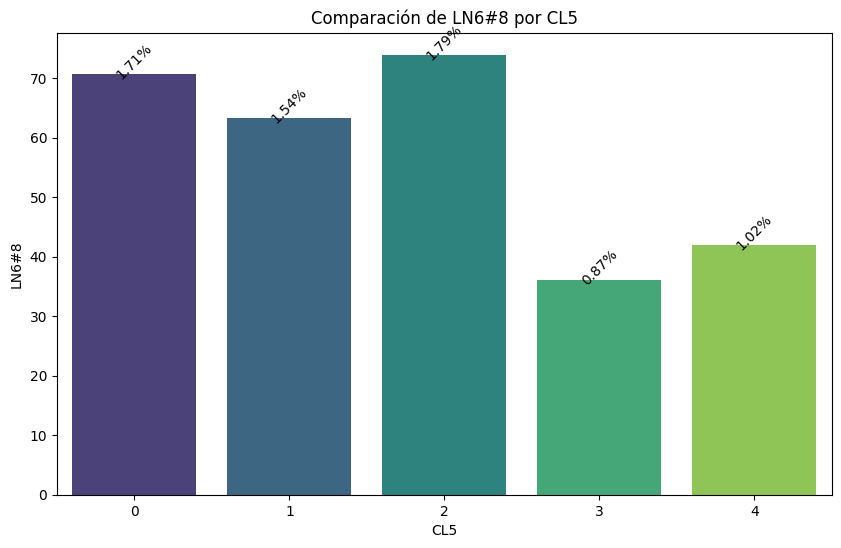


Porcentajes para LN6#8:
Cluster LN6#8:
  0: 1.71%
  1: 1.54%
  2: 1.79%
  3: 0.87%
  4: 1.02%


C:\Users\marce\AppData\Local\Temp\ipykernel_30108\479186507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')


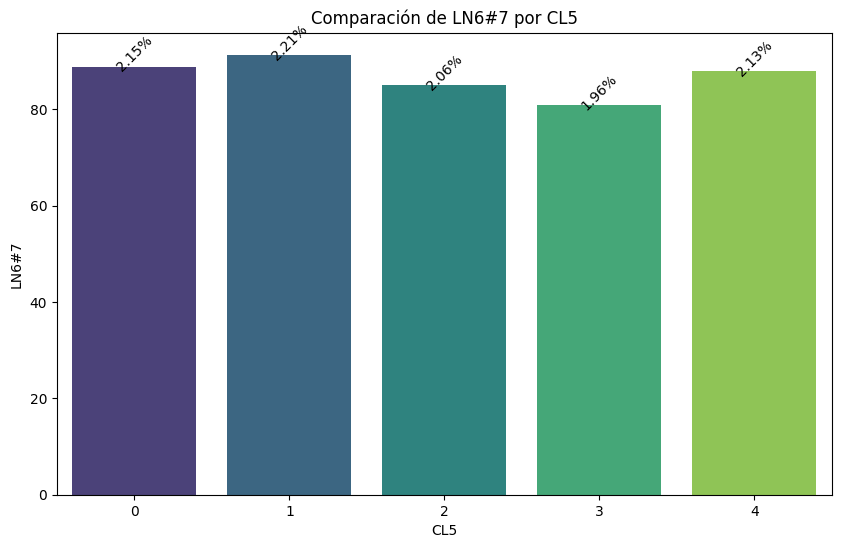


Porcentajes para LN6#7:
Cluster LN6#7:
  0: 2.15%
  1: 2.21%
  2: 2.06%
  3: 1.96%
  4: 2.13%


C:\Users\marce\AppData\Local\Temp\ipykernel_30108\479186507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')


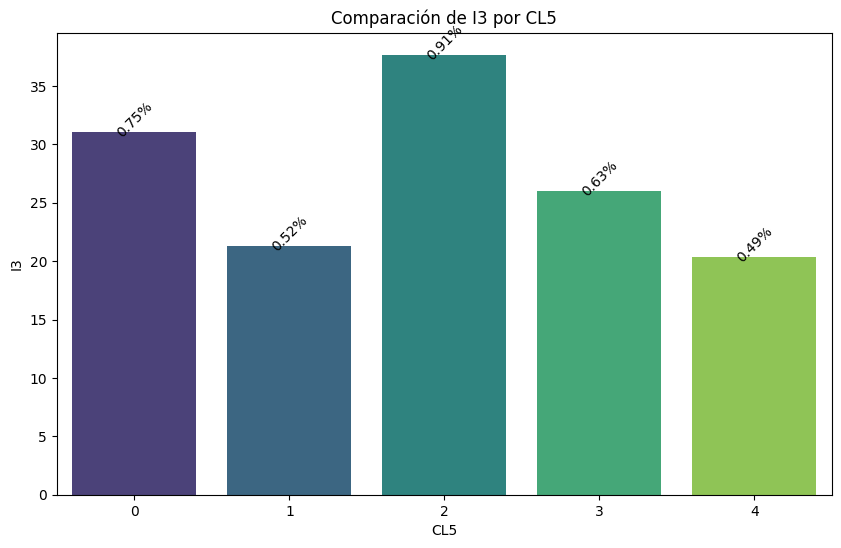


Porcentajes para I3:
Cluster I3:
  0: 0.75%
  1: 0.52%
  2: 0.91%
  3: 0.63%
  4: 0.49%


C:\Users\marce\AppData\Local\Temp\ipykernel_30108\479186507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters_col, y=variable, data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='viridis')


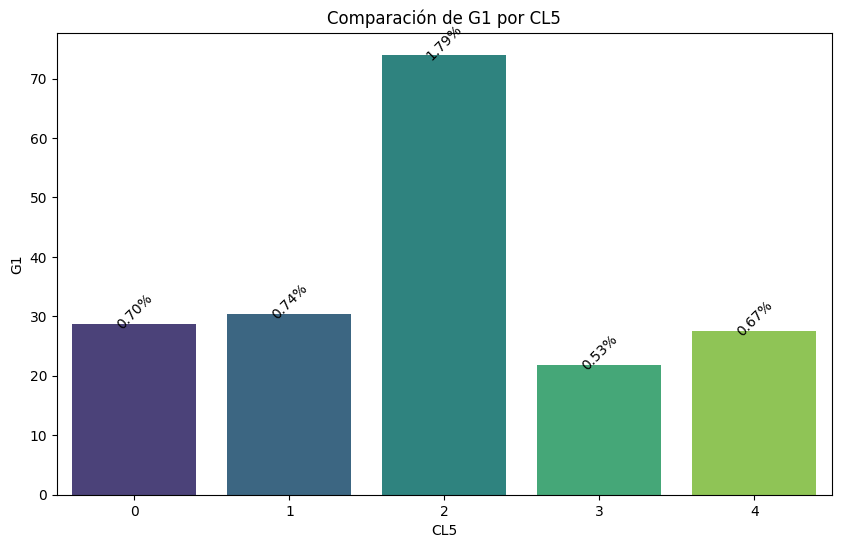


Porcentajes para G1:
Cluster G1:
  0: 0.70%
  1: 0.74%
  2: 1.79%
  3: 0.53%
  4: 0.67%


In [ ]:
# Análisis para cada clusterización con umbral de diferencia del 10%
for cl_col in ['CL2', 'CL3', 'CL5']:
    for var in var_demograf_totales_flat:
        if var in epcc23.columns:
            if calcular_diferencias_significativas_umbral(epcc23, cl_col, var, umbral=10):
                ax = plot_sociodemograficas_clusters(epcc23, cl_col, var, f'Comparación de {renombrar_variables.get(var, var)} por {cl_col}')
                
                # Añadir texto debajo del gráfico
                percentages = calcular_porcentajes(epcc23.groupby(cl_col)[var].mean().to_frame().T, total_entrevistados)
                texto = f'\nPorcentajes para {renombrar_variables.get(var, var)}:'
                for cluster, targets in percentages.items():
                    texto += f'\nCluster {cluster}:'
                    for target, percentage in targets.items():
                        texto += f'\n  {target}: {percentage:.2f}%'
                print(texto)

--------------------------------------------------------------------------------------

Lo que sigue es una red neuronal para predecir los 7 targets a la vez, pero sin hacer ningún fine tuning, ni PCA ni nada de nada. Solo un primer modelo para ver qué tal.    
El resultado, como era de esperarse, es muy malo.


Train y test

In [ ]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test, y4_train, y4_test, y5_train, y5_test, y6_train, y6_test, y7_train, y7_test = train_test_split(
    X, y1, y2, y3, y4, y5, y6, y7, test_size=0.2, random_state=42
)

In [ ]:
# Convertir a numpy arrays
X_train, X_test = np.array(X_train), np.array(X_test)
y1_train, y1_test = np.array(y1_train), np.array(y1_test)
y2_train, y2_test = np.array(y2_train), np.array(y2_test)
y3_train, y3_test = np.array(y3_train), np.array(y3_test)
y4_train, y4_test = np.array(y4_train), np.array(y4_test)
y5_train, y5_test = np.array(y5_train), np.array(y5_test)
y6_train, y6_test = np.array(y6_train), np.array(y6_test)
y7_train, y7_test = np.array(y7_train), np.array(y7_test)

### Prueba de un modelo con múltiples salidas antes de hacer el EDA

In [ ]:
# Definir la entrada del modelo
input_layer = Input(shape=(X_train.shape[1],))

# Crear capas ocultas
hidden_layer = Dense(64, activation='relu')(input_layer)
hidden_layer = Dense(64, activation='relu')(hidden_layer)

In [ ]:
# Crear salidas para cada objetivo
output1 = Dense(1, activation='linear', name='output1')(hidden_layer)
output2 = Dense(1, activation='linear', name='output2')(hidden_layer)
output3 = Dense(1, activation='linear', name='output3')(hidden_layer)
output4 = Dense(1, activation='linear', name='output4')(hidden_layer)
output5 = Dense(1, activation='linear', name='output5')(hidden_layer)
output6 = Dense(1, activation='linear', name='output6')(hidden_layer)
output7 = Dense(1, activation='linear', name='output7')(hidden_layer)

In [ ]:
# Definir el modelo
model = Model(inputs=input_layer, outputs=[output1, output2, output3, output4, output5, output6, output7])

# Compilar el modelo
model.compile(optimizer='adam', 
              loss={'output1': 'mse', 'output2': 'mse', 'output3': 'mse', 'output4': 'mse', 'output5': 'mse', 'output6': 'mse', 'output7': 'mse'}, 
              metrics={'output1': 'mape', 'output2': 'mape', 'output3': 'mape', 'output4': 'mape', 'output5': 'mape', 'output6': 'mape', 'output7': 'mape'})

# Ver la estructura del modelo
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 514)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │     32,960 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      4,160 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output3 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output4 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output5 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output6 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output7 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 37,575 (146.78 KB)

 Trainable params: 37,575 (146.78 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
y1_train = y1_train.astype(float)
y2_train = y2_train.astype(float)
y3_train = y3_train.astype(float)
y4_train = y4_train.astype(float)
y5_train = y5_train.astype(float)
y6_train = y6_train.astype(float)
y7_train = y7_train.astype(float)

y1_test = y1_test.astype(float)
y2_test = y2_test.astype(float)
y3_test = y3_test.astype(float)
y4_test = y4_test.astype(float)
y5_test = y5_test.astype(float)
y6_test = y6_test.astype(float)
y7_test = y7_test.astype(float)

In [ ]:
X_train = np.array(X_train).astype(float)
X_test = np.array(X_test).astype(float)

ValueError: could not convert string to float: '-'

In [ ]:
history = model.fit(X_train, 
                    {'output1': y1_train, 'output2': y2_train, 'output3': y3_train, 'output4': y4_train, 'output5': y5_train, 'output6': y6_train, 'output7': y7_train},
                    validation_data=(X_test, {'output1': y1_test, 'output2': y2_test, 'output3': y3_test, 'output4': y4_test, 'output5': y5_test, 'output6': y6_test, 'output7': y7_test}),
                    epochs=50,
                    batch_size=32)


Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 100450040.0000 - output1_mape: 12519149568.0000 - output2_mape: 21959.5078 - output3_mape: 93845.1016 - output4_mape: 42188.0039 - output5_mape: 68015.3438 - output6_mape: 30715.3555 - output7_mape: 46628.7344 - val_loss: 7877166.5000 - val_output1_mape: 10751592448.0000 - val_output2_mape: 3798.3484 - val_output3_mape: 25447.4434 - val_output4_mape: 14090.5596 - val_output5_mape: 15793.4189 - val_output6_mape: 37461.2539 - val_output7_mape: 5180.0503
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7966329.5000 - output1_mape: 9252598784.0000 - output2_mape: 5227.0020 - output3_mape: 23710.4277 - output4_mape: 13275.4229 - output5_mape: 12607.3037 - output6_mape: 31750.0801 - output7_mape: 3839.5662 - val_loss: 6768547.5000 - val_output1_mape: 8233361408.0000 - val_output2_mape: 3004.0669 - val_output3_mape: 19662.6055 - val_output4_mape: 13496.2021 - val_output5_mape: 12494.8691 - val_output6_mape: 27982.2793 - va

In [ ]:
# Definir los nombres de las variables correspondientes a cada salida
output_names = {
    'output1': 'VJ1B',
    'output2': 'M2',
    'output3': 'CO1A#1' + 'CO1A#2',
    'output4': 'CN1A',
    'output5': 'ES1A',
    'output6': 'EX1A#1 + EX1A#2 + EX1A#3 + EX1A#4',
    'output7': 'LL1A'    
}

# Evaluar el modelo
results = model.evaluate(X_test, 
                         {'output1': y1_test, 'output2': y2_test, 'output3': y3_test, 'output4': y4_test, 'output5': y5_test, 'output6': y6_test, 'output7': y7_test})

# Mostrar los resultados
print(f'Total loss: {results[0]}')
for i, name in enumerate(output_names.values()):
    print(f'{name} - MAPE: {results[i+1]}')


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 153849.6719 - output1_mape: 219886320.0000 - output2_mape: 773.1570 - output3_mape: 1907.1516 - output4_mape: 1819.8566 - output5_mape: 1044.1174 - output6_mape: 1985.4279 - output7_mape: 1225.2242
Total loss: 153436.453125
VJ1B - MAPE: 526731104.0
M2 - MAPE: 778.6439208984375
CO1A#1CO1A#2 - MAPE: 1805.446044921875
CN1A - MAPE: 1848.5904541015625
ES1A - MAPE: 1039.4998779296875
EX1A#1 + EX1A#2 + EX1A#3 + EX1A#4 - MAPE: 1949.18408203125
LL1A - MAPE: 1115.4517822265625


A primera vista parece una caca de modelo con un margen de error mega alto. Incluso en el el caso de música que "solo" erra por 9... se trata de horas que ha escuchado música, es decir que es sobre 24 horas, más de un 30%

In [ ]:
# Guardar el modelo en el formato de Keras
model.save('Modelo1Caca-1648-37-9M.keras')

# Confirmación de que el modelo se ha guardado
print("Modelo guardado como Modelo1Caca1648-37-9M.keras")


Modelo guardado como Modelo1Caca1648-37-9M.keras


In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
loaded_model = load_model('Modelo1Caca1648-37-9M.keras')

# Confirmación de que el modelo se ha cargado
print("Modelo cargado correctamente")


Modelo cargado correctamente
